### EXP_2389_seq_prune_08_4_256_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import pickle
import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [3 2 8 9]
3
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 5s - loss: 0.0709 - accuracy: 0.9752 - val_loss: 0.0543 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.0592 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 8.9285e-04 - accuracy: 0.9998 - val_loss: 0.0825 - val_accuracy: 0.9833
Epoch 4/5
1250/1250 - 5s - loss: 1.6432e-05 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 5s - loss: 2.8251e-06 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 0.9857


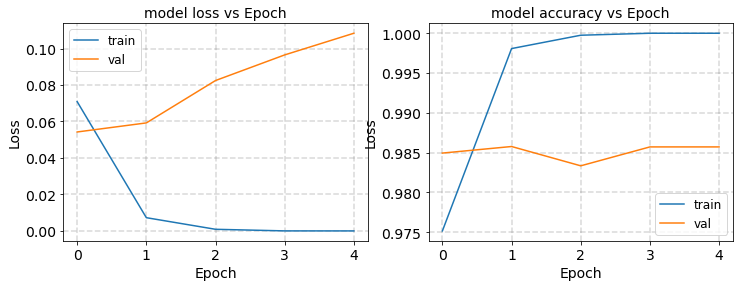

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0622 - accuracy: 0.9854 - val_loss: 0.0384 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0439 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 5s - loss: 1.8255e-04 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 2.1014e-05 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 7.4393e-06 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9921


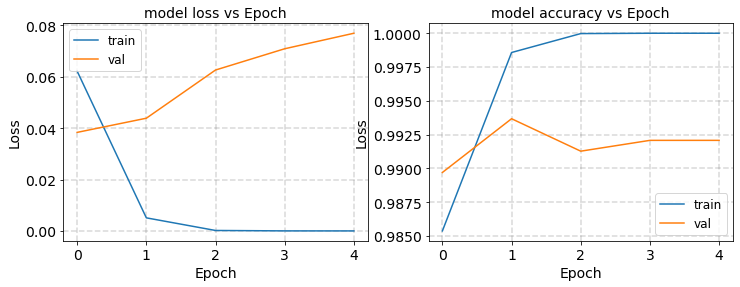

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0872 - accuracy: 0.9784 - val_loss: 0.0612 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 5s - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0866 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 5s - loss: 2.8501e-04 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 6s - loss: 2.7926e-05 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 9.7136e-06 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9842


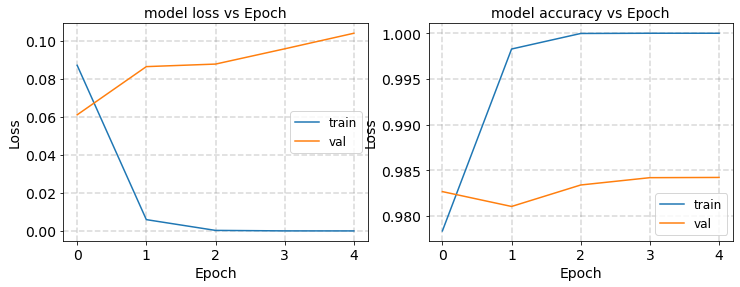

9
Epoch 1/5
1250/1250 - 6s - loss: 0.0723 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 6s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0594 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 6s - loss: 1.2146e-04 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 5s - loss: 2.2958e-05 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 6.4856e-06 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9882


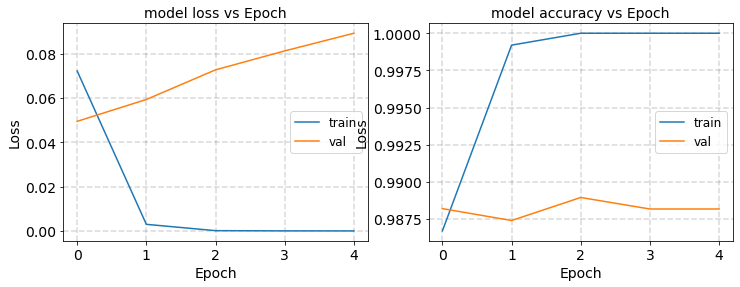

round1 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 6s - loss: 0.0724 - accuracy: 0.9843 - val_loss: 0.0583 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 7s - loss: 2.7513e-04 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 6s - loss: 4.2057e-05 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 1.2088e-05 - accuracy: 1.0000 - val_loss: 0.0911 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 5s - loss: 3.9698e-06 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9858


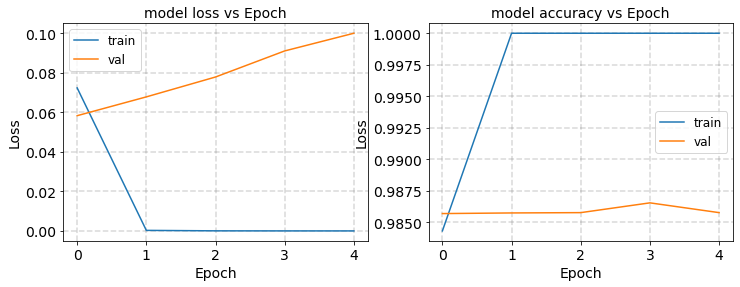

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0748 - accuracy: 0.9844 - val_loss: 0.0429 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0444 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 5s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0490 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 4.8757e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 2.5973e-06 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9937


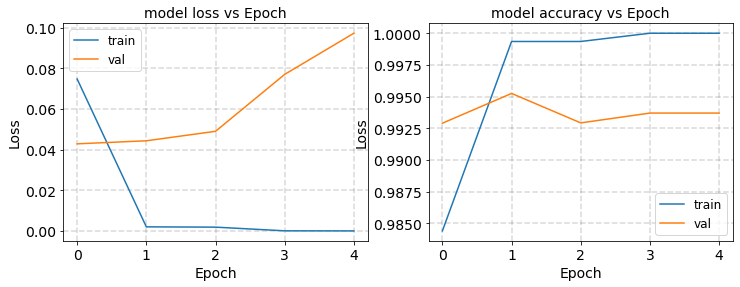

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0931 - accuracy: 0.9877 - val_loss: 0.0650 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 5s - loss: 6.5103e-04 - accuracy: 0.9999 - val_loss: 0.0784 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 4s - loss: 7.3842e-05 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 5s - loss: 2.1402e-05 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 4s - loss: 7.8784e-06 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 0.9881


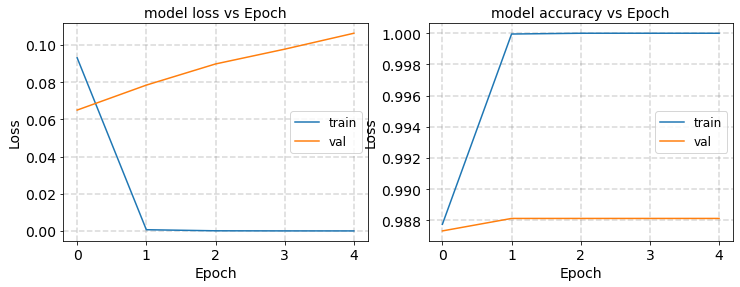

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0996 - accuracy: 0.9806 - val_loss: 0.0636 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0772 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 1.7908e-04 - accuracy: 1.0000 - val_loss: 0.0850 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 4.5772e-05 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 5s - loss: 1.6173e-05 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9811


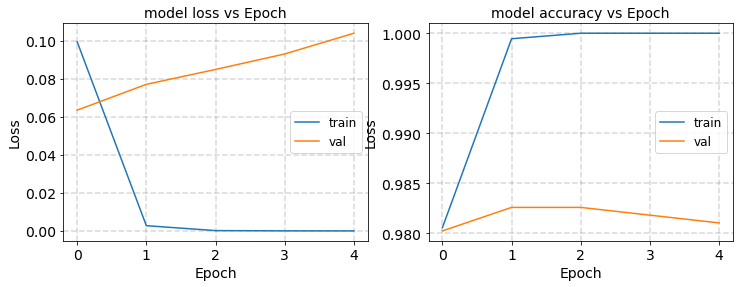

round2 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 5s - loss: 0.0743 - accuracy: 0.9872 - val_loss: 0.0563 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 6s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0701 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 6s - loss: 1.3776e-04 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 6s - loss: 2.7608e-05 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 6s - loss: 7.8019e-06 - accuracy: 1.0000 - val_loss: 0.0957 - val_accuracy: 0.9874


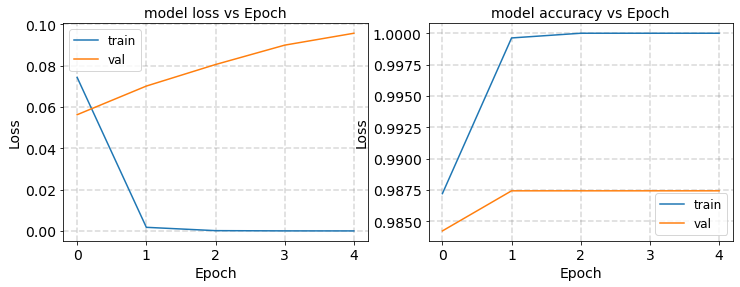

8
Epoch 1/5
1250/1250 - 6s - loss: 0.1050 - accuracy: 0.9820 - val_loss: 0.0586 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 6s - loss: 5.9485e-04 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 6.7059e-05 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 6s - loss: 1.8536e-05 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 6s - loss: 6.3175e-06 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9850


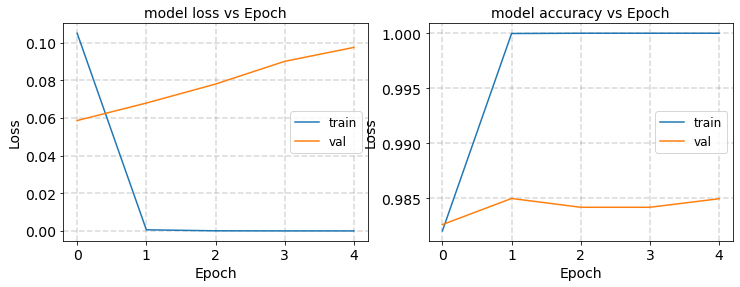

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0852 - accuracy: 0.9893 - val_loss: 0.0622 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 6s - loss: 1.7493e-04 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 6s - loss: 2.6493e-05 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 6s - loss: 7.7483e-06 - accuracy: 1.0000 - val_loss: 0.1061 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 6s - loss: 2.5103e-06 - accuracy: 1.0000 - val_loss: 0.1157 - val_accuracy: 0.9906


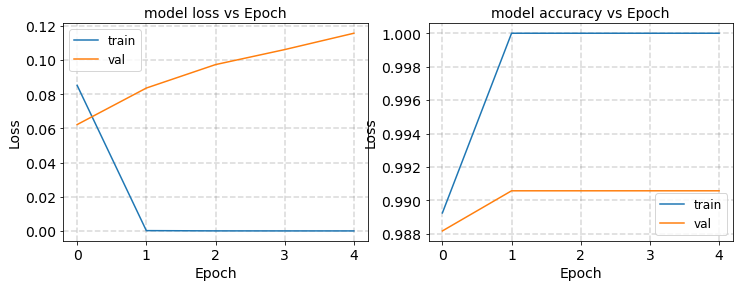

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0900 - accuracy: 0.9887 - val_loss: 0.0747 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 4.6249e-04 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 5.3789e-05 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 5s - loss: 1.5653e-05 - accuracy: 1.0000 - val_loss: 0.1151 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 5.5950e-06 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 0.9834


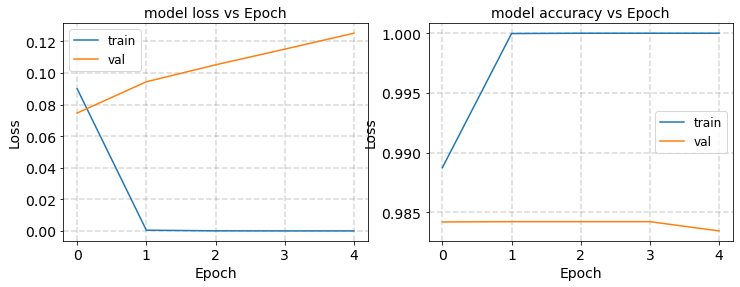

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 256)               131330    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

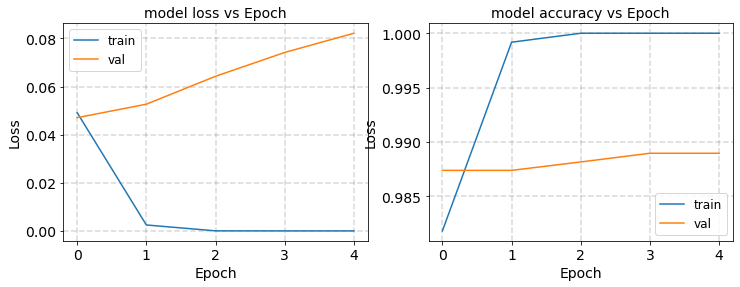

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0926 - accuracy: 0.9786 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 4s - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0621 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0982 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 5.0050e-05 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 1.5870e-05 - accuracy: 1.0000 - val_loss: 0.1256 - val_accuracy: 0.9842


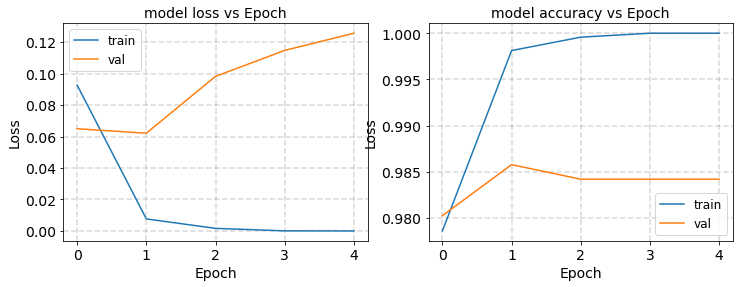

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0645 - accuracy: 0.9870 - val_loss: 0.0660 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0448 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 1.6624e-04 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 1.9022e-05 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 7.0799e-06 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9937


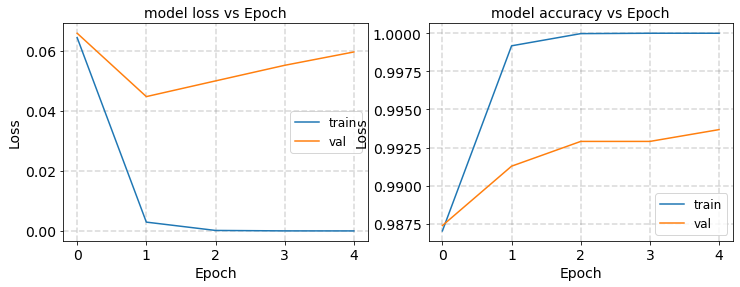

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0874 - accuracy: 0.9811 - val_loss: 0.0676 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0974 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 5s - loss: 8.3794e-04 - accuracy: 0.9998 - val_loss: 0.0989 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 2.9610e-05 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 1.0585e-05 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9850


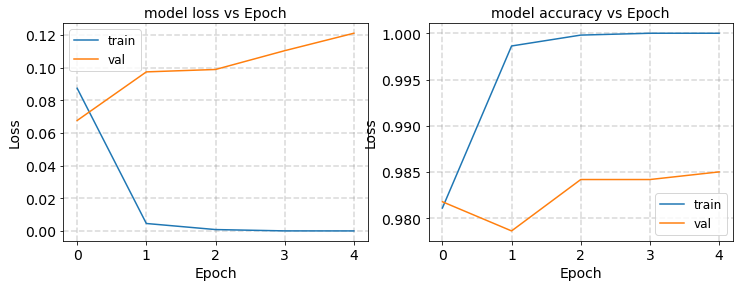

round1 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 5s - loss: 0.0768 - accuracy: 0.9854 - val_loss: 0.0713 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0706 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 1.6830e-04 - accuracy: 1.0000 - val_loss: 0.0920 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 2.5722e-05 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 9.9238e-06 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9858


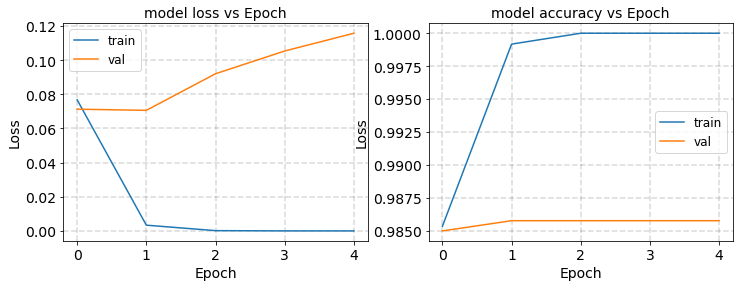

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0724 - accuracy: 0.9876 - val_loss: 0.0511 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 5s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0496 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 6s - loss: 8.4942e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 6s - loss: 1.4167e-05 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 6s - loss: 3.2879e-06 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9921


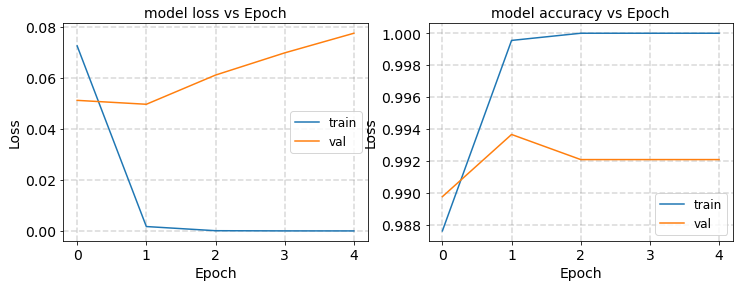

9
Epoch 1/5
1250/1250 - 6s - loss: 0.0865 - accuracy: 0.9872 - val_loss: 0.0640 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 6s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0731 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 1.2265e-04 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 6s - loss: 2.8505e-05 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 6s - loss: 1.0656e-05 - accuracy: 1.0000 - val_loss: 0.1059 - val_accuracy: 0.9897


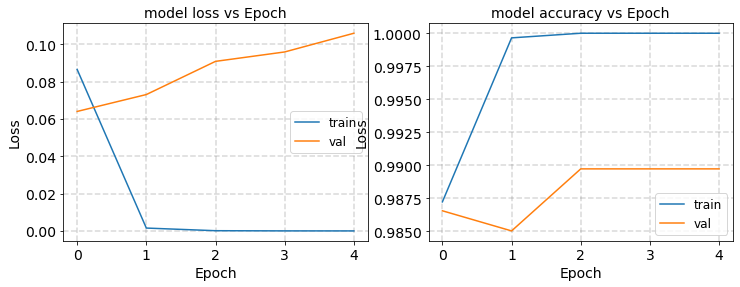

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0899 - accuracy: 0.9800 - val_loss: 0.0684 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 6s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0931 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 6s - loss: 2.1867e-04 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 7s - loss: 3.9914e-05 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 6s - loss: 1.6644e-05 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9826


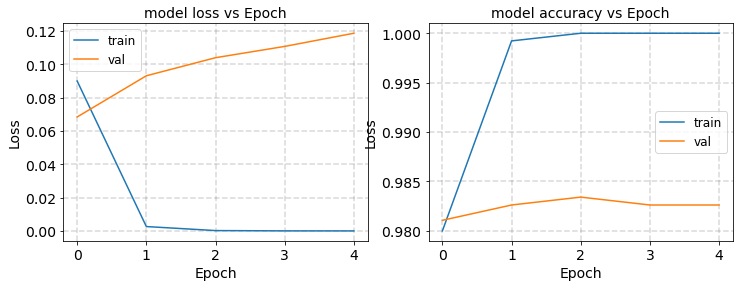

round2 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 6s - loss: 0.0916 - accuracy: 0.9840 - val_loss: 0.0594 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 6s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0591 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 6s - loss: 2.0074e-04 - accuracy: 1.0000 - val_loss: 0.0735 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 6s - loss: 5.8546e-05 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 6s - loss: 1.9272e-05 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9882


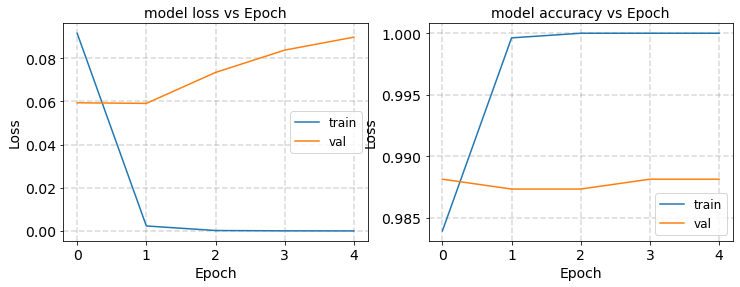

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0636 - accuracy: 0.9903 - val_loss: 0.0537 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 6s - loss: 4.1350e-04 - accuracy: 0.9999 - val_loss: 0.0698 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 6s - loss: 5.1485e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 6s - loss: 1.0932e-05 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 6s - loss: 3.0218e-06 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9913


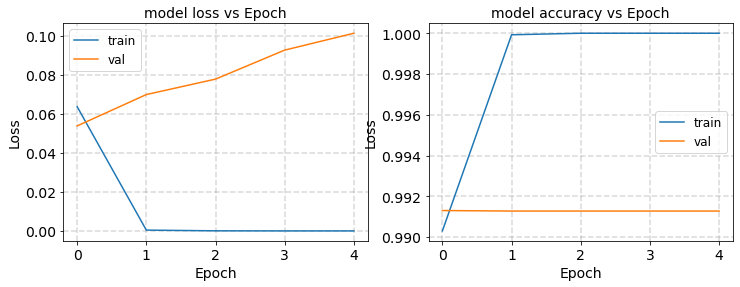

9
Epoch 1/5
1250/1250 - 6s - loss: 0.0823 - accuracy: 0.9890 - val_loss: 0.0488 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 6s - loss: 4.7589e-04 - accuracy: 0.9999 - val_loss: 0.0678 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 6s - loss: 5.3511e-05 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 6s - loss: 1.9516e-05 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 6s - loss: 7.7182e-06 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9898


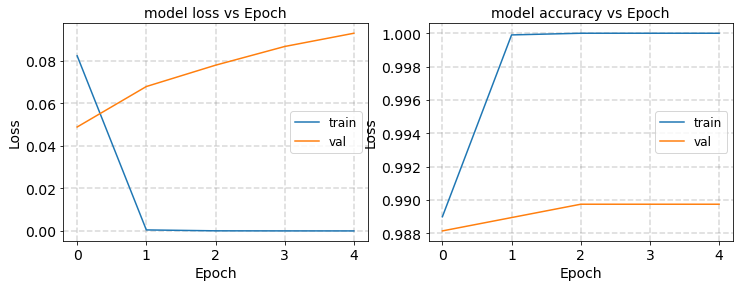

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0688 - accuracy: 0.9884 - val_loss: 0.0927 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 6s - loss: 2.9499e-04 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 6s - loss: 5.1994e-05 - accuracy: 1.0000 - val_loss: 0.1297 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 6s - loss: 1.8167e-05 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 6s - loss: 7.3433e-06 - accuracy: 1.0000 - val_loss: 0.1580 - val_accuracy: 0.9818


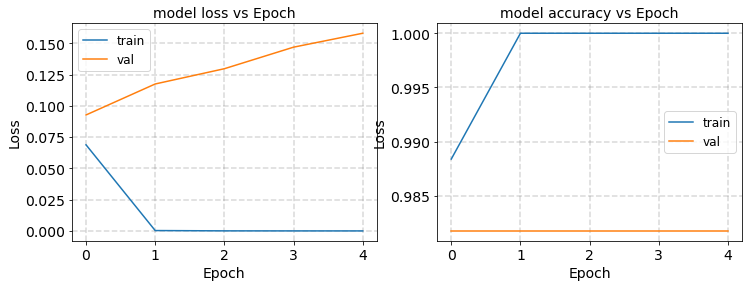

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 256)               131330    
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

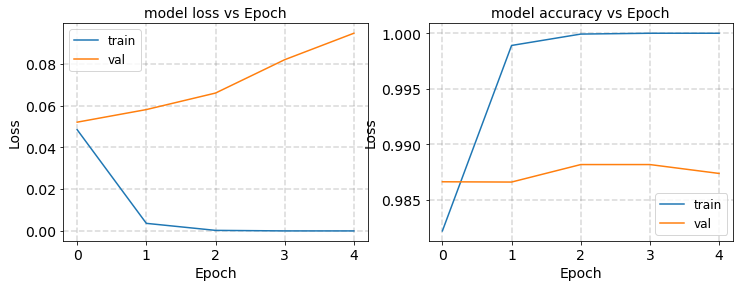

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0871 - accuracy: 0.9787 - val_loss: 0.0483 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 6s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0493 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 6s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0477 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 6s - loss: 6.1181e-04 - accuracy: 0.9997 - val_loss: 0.0512 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 6s - loss: 2.4411e-05 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9929


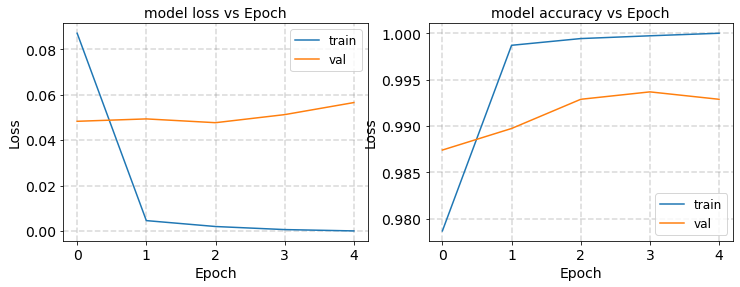

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0958 - accuracy: 0.9767 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 6s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0533 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 3.0975e-04 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 6s - loss: 5.0702e-05 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 6s - loss: 1.6548e-05 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9874


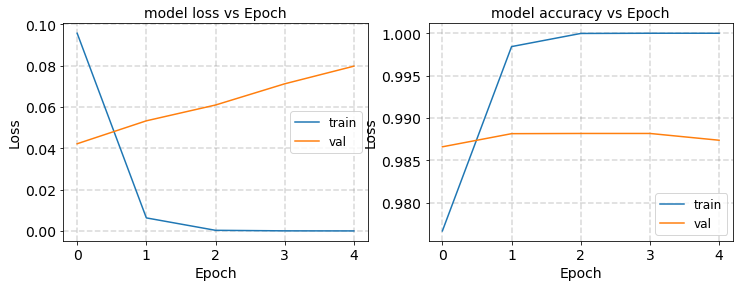

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0852 - accuracy: 0.9824 - val_loss: 0.0460 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 6s - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0706 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 6s - loss: 1.8228e-04 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 2.6499e-05 - accuracy: 1.0000 - val_loss: 0.1066 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 6s - loss: 8.8880e-06 - accuracy: 1.0000 - val_loss: 0.1222 - val_accuracy: 0.9842


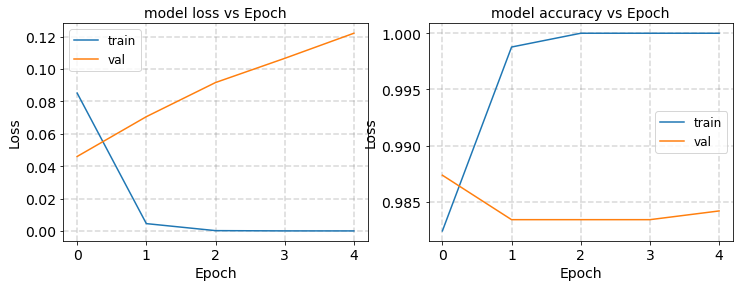

round1 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 6s - loss: 0.0755 - accuracy: 0.9844 - val_loss: 0.0553 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 7s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0595 - val_accuracy: 0.9857
Epoch 3/5
1250/1250 - 6s - loss: 3.9068e-04 - accuracy: 0.9999 - val_loss: 0.0679 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 3.0752e-05 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 1.2850e-05 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9873


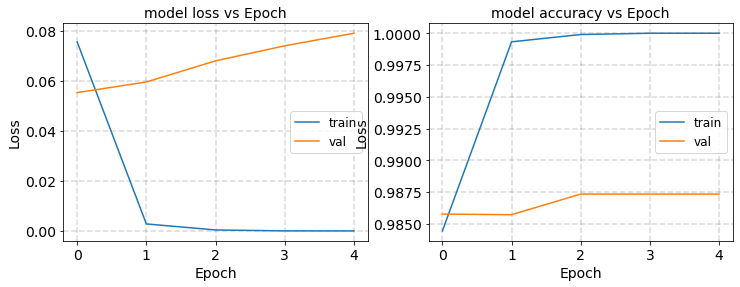

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0757 - accuracy: 0.9871 - val_loss: 0.0401 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0503 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 5s - loss: 7.8970e-05 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 6s - loss: 2.0302e-05 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 6s - loss: 7.3668e-06 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9929


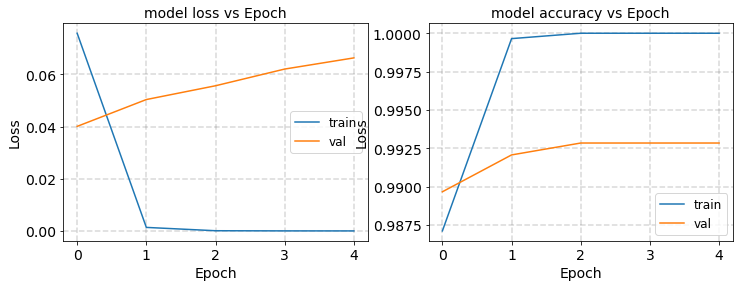

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0766 - accuracy: 0.9883 - val_loss: 0.0502 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 4.1626e-04 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 4.8026e-05 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 5s - loss: 1.1125e-05 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 5s - loss: 3.5271e-06 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9898


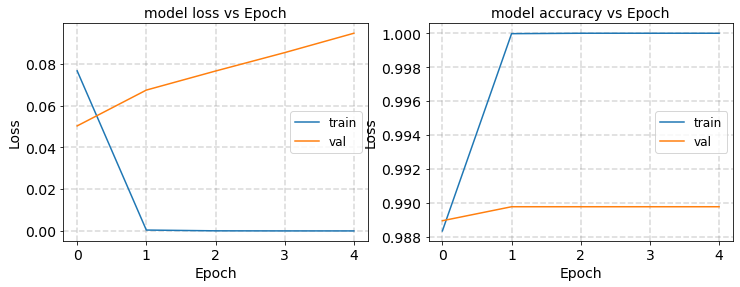

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1098 - accuracy: 0.9781 - val_loss: 0.0632 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 5s - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0796 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 5s - loss: 6.0187e-04 - accuracy: 0.9999 - val_loss: 0.0813 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 6.3727e-05 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 5s - loss: 2.1733e-05 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9834


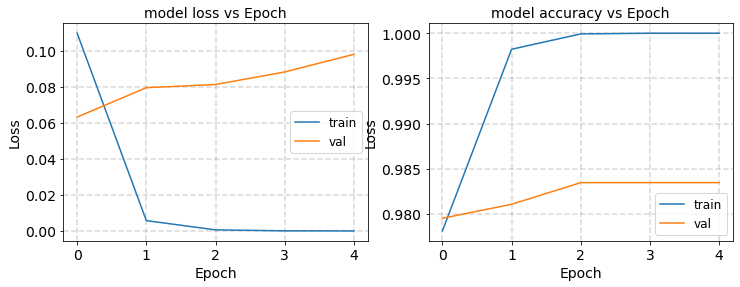

round2 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 6s - loss: 0.0943 - accuracy: 0.9821 - val_loss: 0.0332 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0472 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 6s - loss: 2.1849e-04 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 6s - loss: 5.2628e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 6s - loss: 1.9632e-05 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9905


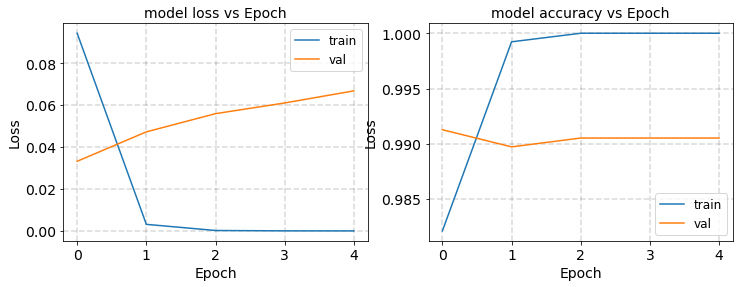

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0771 - accuracy: 0.9848 - val_loss: 0.0704 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 6s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0747 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 6s - loss: 1.2087e-04 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 6s - loss: 3.5139e-05 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 5s - loss: 1.4045e-05 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9818


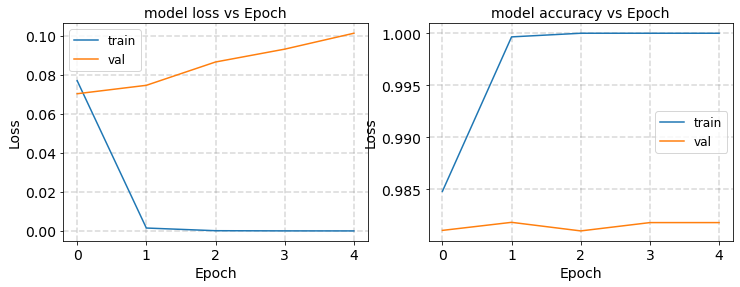

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0931 - accuracy: 0.9812 - val_loss: 0.0801 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 6s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.1009 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 6s - loss: 4.1088e-04 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 6s - loss: 6.3150e-05 - accuracy: 1.0000 - val_loss: 0.1320 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 5s - loss: 2.0669e-05 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9794


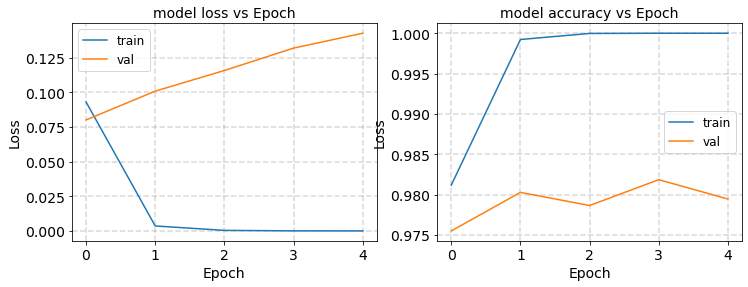

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0619 - accuracy: 0.9913 - val_loss: 0.0636 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0719 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 1.7623e-04 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 5s - loss: 4.5595e-05 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 5s - loss: 1.3583e-05 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9906


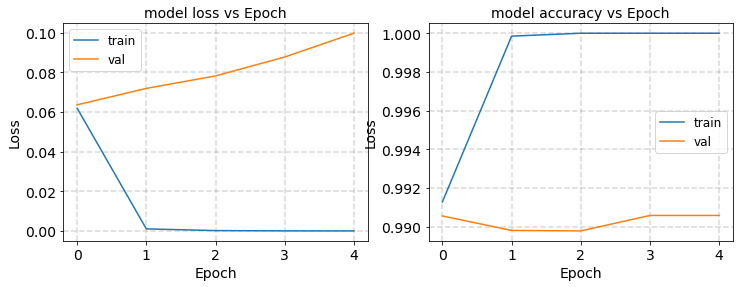

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 256)               131330    
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

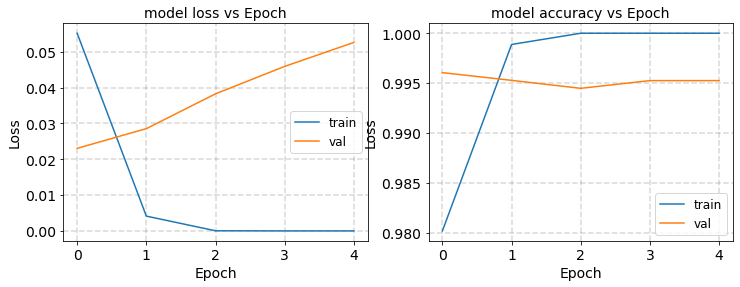

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0781 - accuracy: 0.9857 - val_loss: 0.0438 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0592 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 1.2201e-04 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 6s - loss: 2.9678e-05 - accuracy: 1.0000 - val_loss: 0.0824 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 6s - loss: 1.1770e-05 - accuracy: 1.0000 - val_loss: 0.0902 - val_accuracy: 0.9858


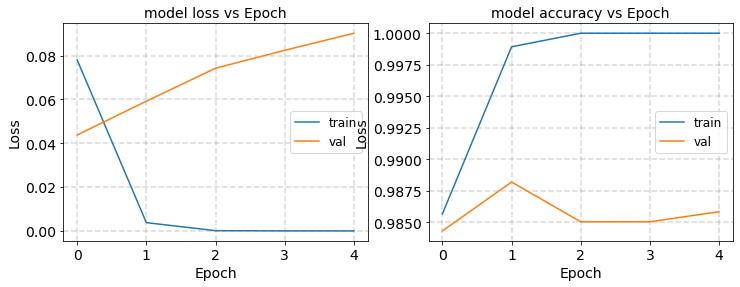

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0934 - accuracy: 0.9767 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 6s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0528 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 6s - loss: 1.8037e-04 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 6s - loss: 2.8775e-05 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 6s - loss: 1.0021e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9858


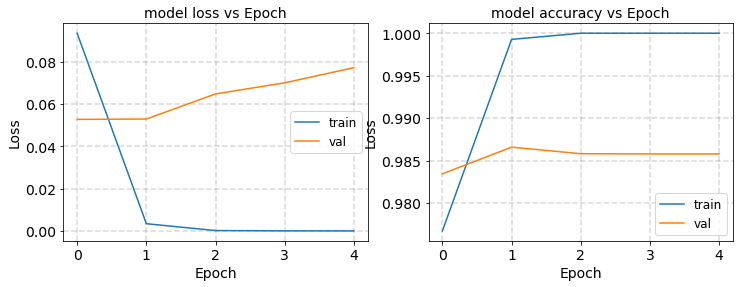

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0925 - accuracy: 0.9803 - val_loss: 0.0486 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 6s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0793 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 4.2345e-04 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 6s - loss: 3.5133e-05 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 1.1840e-05 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 0.9850


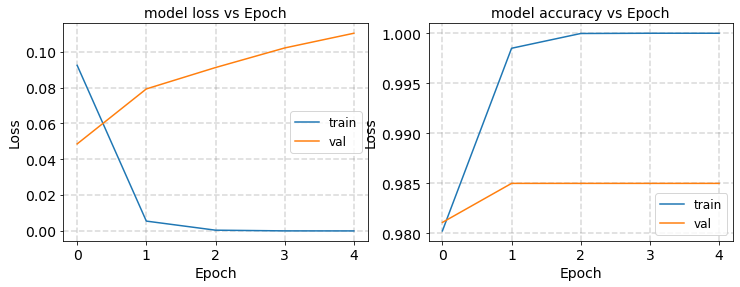

round1 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 6s - loss: 0.0597 - accuracy: 0.9891 - val_loss: 0.0554 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 6s - loss: 6.2062e-04 - accuracy: 0.9998 - val_loss: 0.0691 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 7s - loss: 3.3803e-05 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 6s - loss: 8.1306e-06 - accuracy: 1.0000 - val_loss: 0.0874 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 6s - loss: 2.8757e-06 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9922


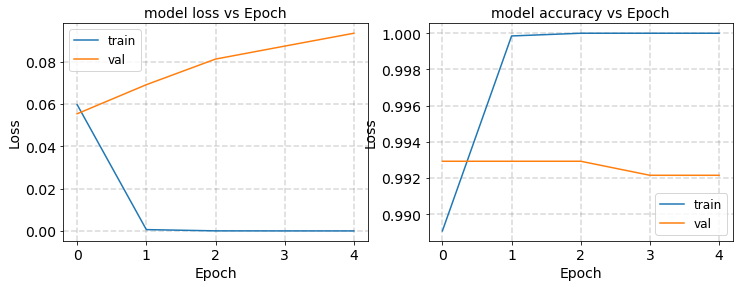

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0854 - accuracy: 0.9843 - val_loss: 0.0762 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 6s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0669 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 5.3810e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 6s - loss: 1.6007e-05 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 6s - loss: 4.2928e-06 - accuracy: 1.0000 - val_loss: 0.0980 - val_accuracy: 0.9882


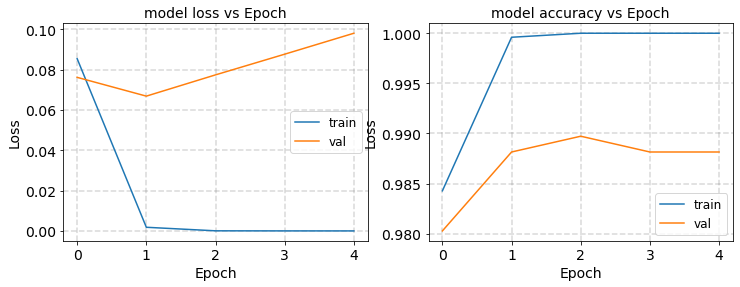

3
Epoch 1/5
1250/1250 - 6s - loss: 0.1048 - accuracy: 0.9801 - val_loss: 0.0544 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 6s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0704 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 1.2083e-04 - accuracy: 1.0000 - val_loss: 0.0768 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 3.4336e-05 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 1.1645e-05 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9850


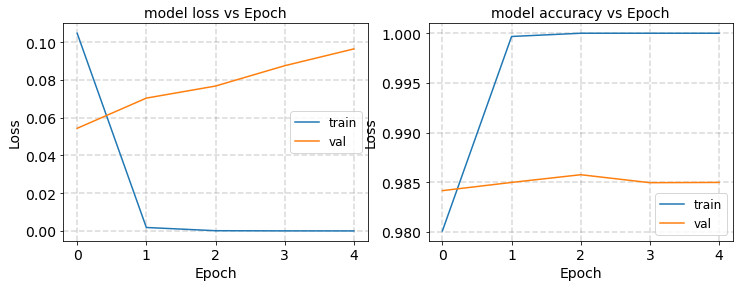

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0710 - accuracy: 0.9889 - val_loss: 0.0436 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 5s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0490 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 1.1492e-04 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 1.5567e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 4.1972e-06 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 0.9913


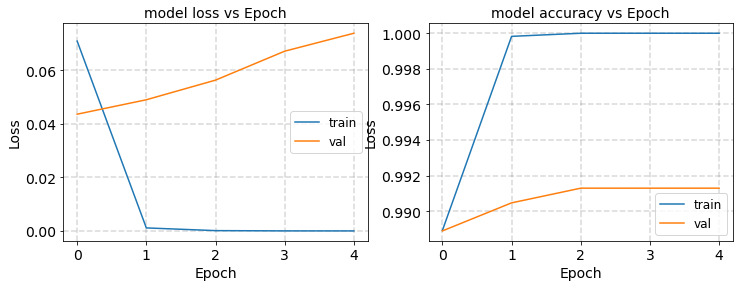

round2 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 5s - loss: 0.1049 - accuracy: 0.9799 - val_loss: 0.0647 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 5s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0778 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 1.9194e-04 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 4.5692e-05 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 6s - loss: 1.7083e-05 - accuracy: 1.0000 - val_loss: 0.1050 - val_accuracy: 0.9858


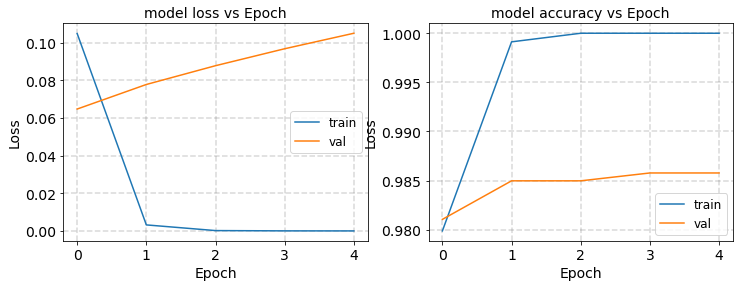

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0805 - accuracy: 0.9827 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0552 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 2.2225e-04 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 5.0737e-05 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 5s - loss: 2.0152e-05 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9866


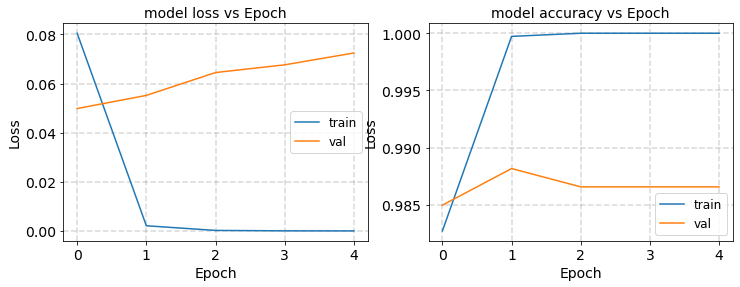

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0813 - accuracy: 0.9851 - val_loss: 0.0391 - val_accuracy: 0.9953
Epoch 2/5
1250/1250 - 5s - loss: 5.5208e-04 - accuracy: 0.9999 - val_loss: 0.0480 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 5s - loss: 7.0186e-05 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 5s - loss: 1.8455e-05 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 6s - loss: 6.5063e-06 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9945


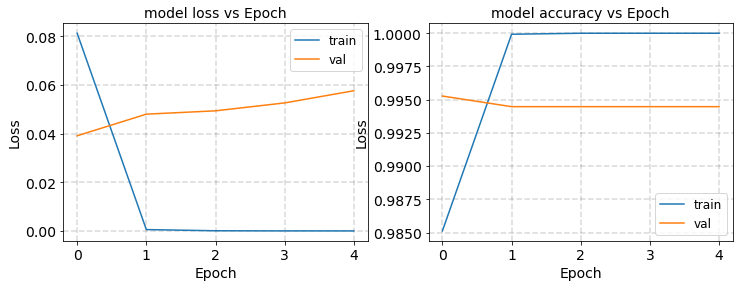

9
Epoch 1/5
1250/1250 - 6s - loss: 0.0754 - accuracy: 0.9878 - val_loss: 0.0733 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0871 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 9.2458e-05 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 2.6946e-05 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 5s - loss: 1.0678e-05 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9850


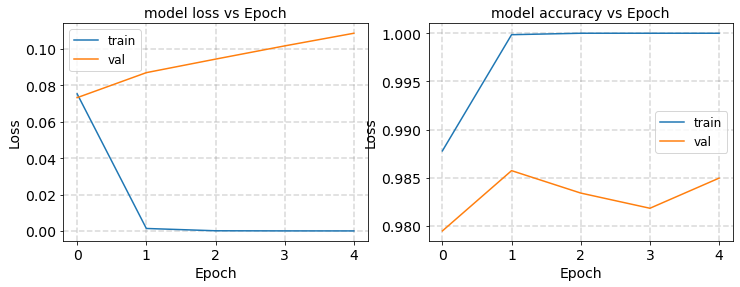

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 256)               131330    
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

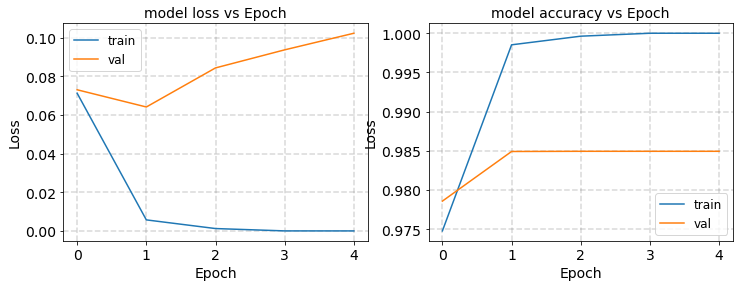

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0734 - accuracy: 0.9823 - val_loss: 0.0422 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 6s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0820 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 6s - loss: 1.8013e-04 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 5s - loss: 1.7079e-05 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 6s - loss: 5.1585e-06 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9929


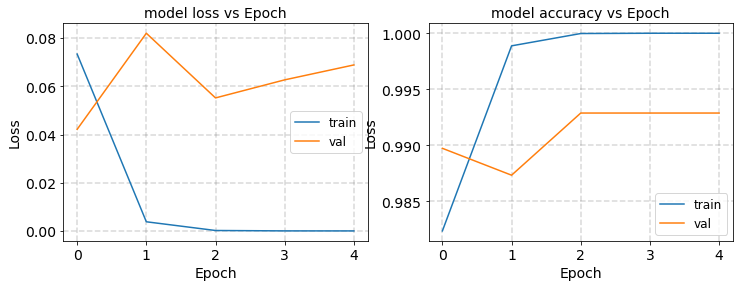

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0863 - accuracy: 0.9791 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 6s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0955 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 6s - loss: 1.5172e-04 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 5s - loss: 2.5414e-05 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 9.6727e-06 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9842


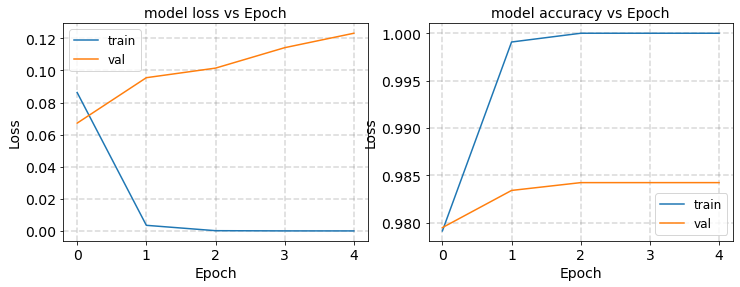

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0672 - accuracy: 0.9870 - val_loss: 0.0427 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 5s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0472 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 9.6212e-05 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 1.9480e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 6.3608e-06 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9897


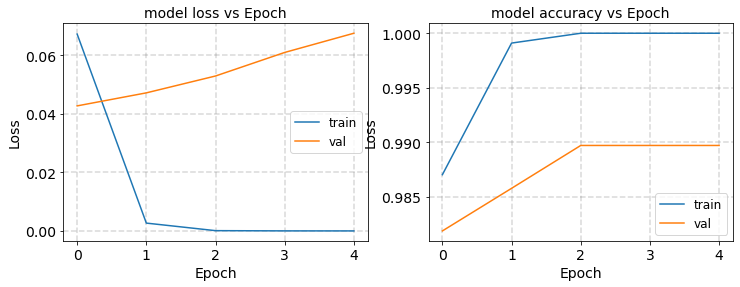

round1 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 5s - loss: 2.3036e-06 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 8.9592e-07 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 3.8098e-07 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 5s - loss: 1.7009e-07 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 7.9150e-08 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9890


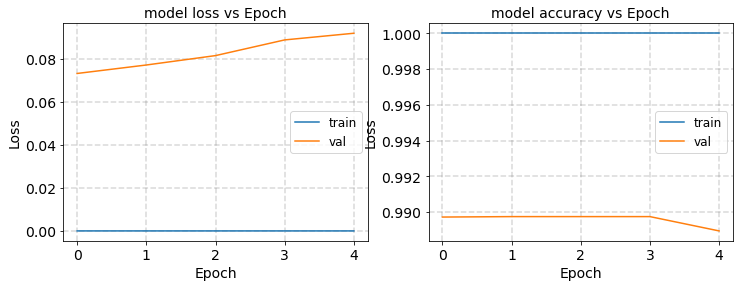

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0761 - accuracy: 0.9868 - val_loss: 0.0646 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 4.2502e-04 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 6.7442e-05 - accuracy: 1.0000 - val_loss: 0.0906 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 2.1313e-05 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 6.9014e-06 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9834


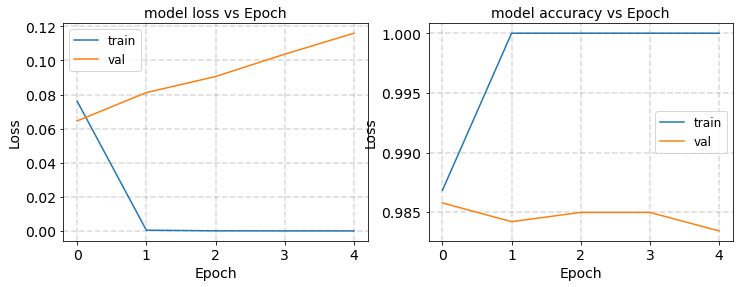

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0861 - accuracy: 0.9845 - val_loss: 0.0397 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0503 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 4s - loss: 2.4348e-04 - accuracy: 0.9999 - val_loss: 0.0588 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 2.1402e-05 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 6.7104e-06 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9944


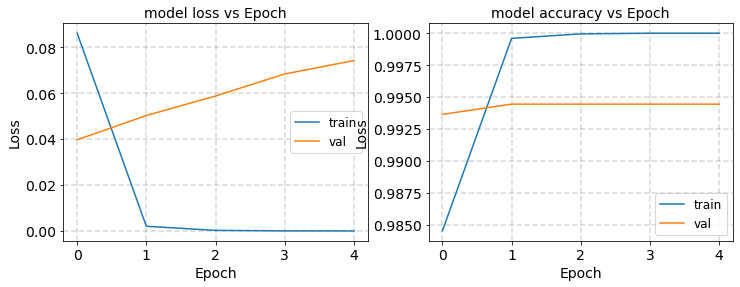

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0946 - accuracy: 0.9812 - val_loss: 0.0599 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0777 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 1.1078e-04 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 3.2295e-05 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 6s - loss: 1.1086e-05 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9841


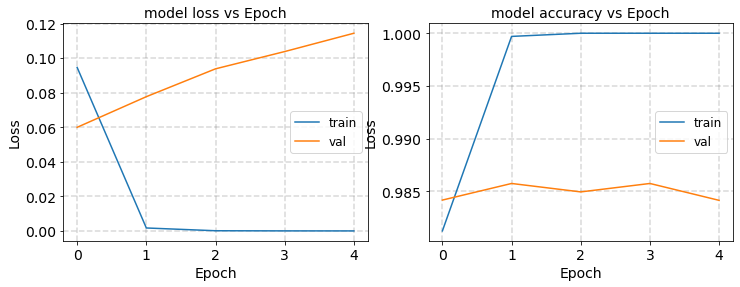

round2 [8 9 3 2]
8
Epoch 1/5
1250/1250 - 5s - loss: 0.0749 - accuracy: 0.9851 - val_loss: 0.0703 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 6.5255e-04 - accuracy: 0.9999 - val_loss: 0.0916 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 6.1954e-05 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 2.0692e-05 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 7.7946e-06 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9858


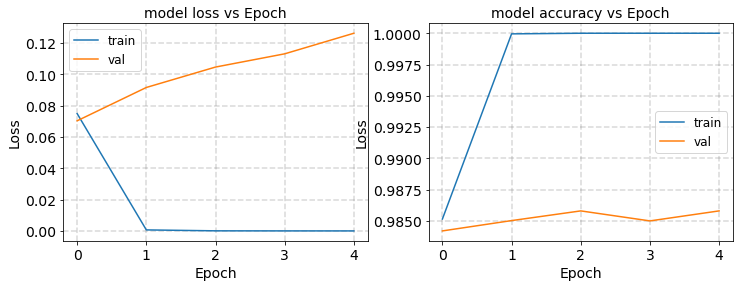

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0759 - accuracy: 0.9890 - val_loss: 0.0473 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 6s - loss: 2.6006e-04 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 4.3980e-05 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 6s - loss: 1.1004e-05 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 6s - loss: 3.6726e-06 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9890


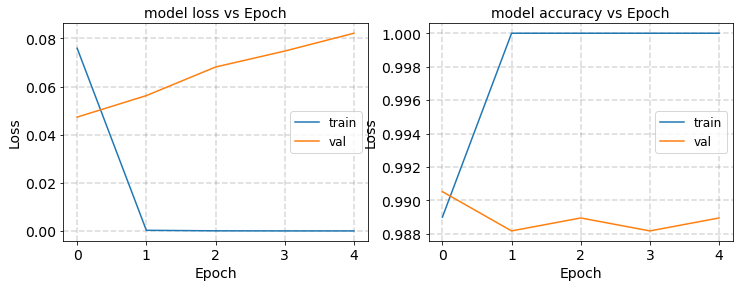

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0932 - accuracy: 0.9826 - val_loss: 0.0501 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 6s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0645 - val_accuracy: 0.9841
Epoch 3/5
1250/1250 - 6s - loss: 1.1787e-04 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 6s - loss: 2.5175e-05 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 7.4574e-06 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9857


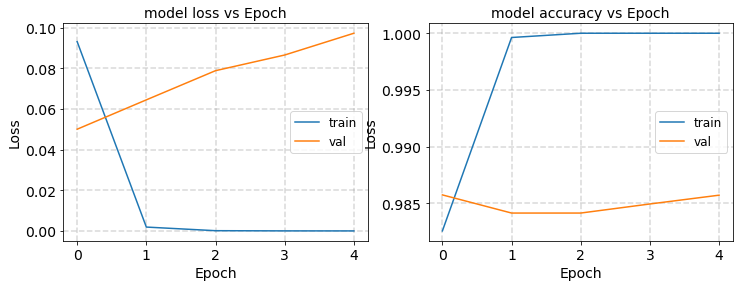

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0902 - accuracy: 0.9874 - val_loss: 0.0439 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 6s - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0588 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 6s - loss: 2.5003e-04 - accuracy: 1.0000 - val_loss: 0.0685 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 6s - loss: 5.2024e-05 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 6s - loss: 1.8340e-05 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9944


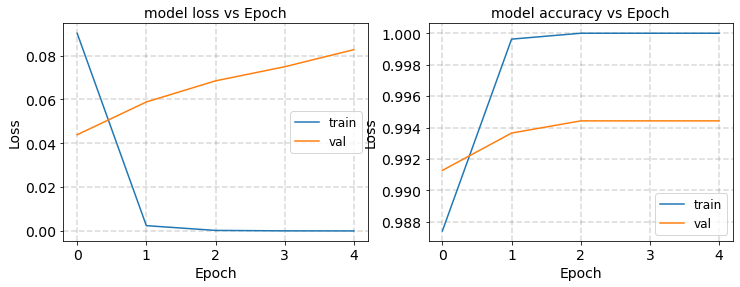

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 256)               131330    
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

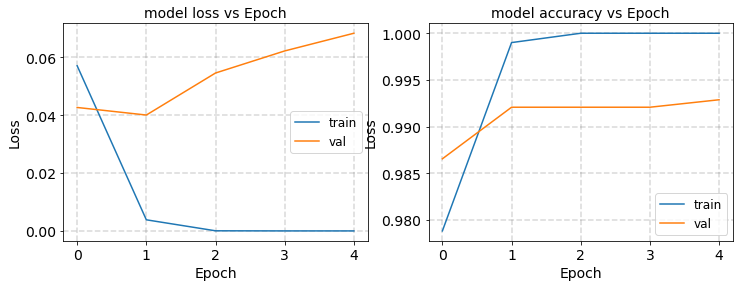

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0934 - accuracy: 0.9785 - val_loss: 0.0696 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 5s - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.0685 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 1.9925e-04 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 3.0345e-05 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 9.4577e-06 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9873


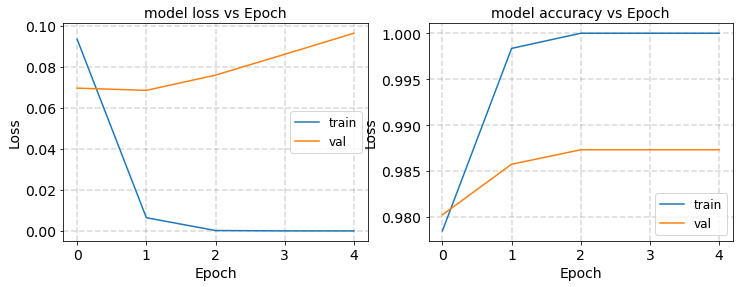

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0859 - accuracy: 0.9801 - val_loss: 0.0536 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 5s - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0689 - val_accuracy: 0.9841
Epoch 3/5
1250/1250 - 5s - loss: 7.2971e-04 - accuracy: 0.9999 - val_loss: 0.0817 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 5s - loss: 4.9062e-05 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 5s - loss: 1.4366e-05 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9857


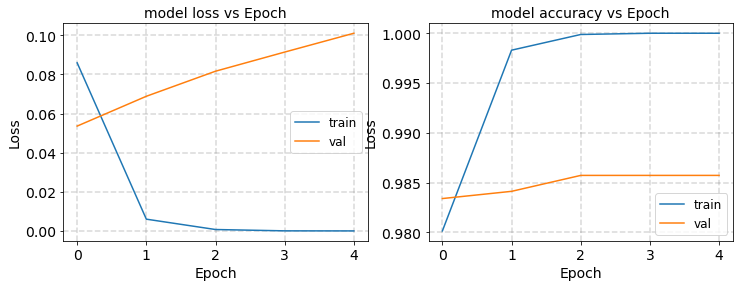

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0664 - accuracy: 0.9874 - val_loss: 0.0453 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0556 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 1.6487e-04 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 5s - loss: 2.6532e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 6s - loss: 1.0821e-05 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9898


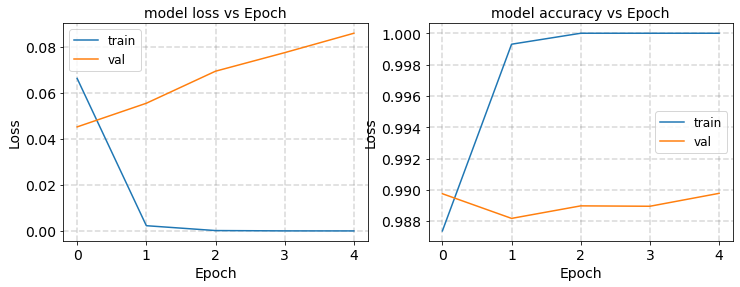

round1 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 6s - loss: 4.8022e-06 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 6s - loss: 2.0924e-06 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 6s - loss: 9.6960e-07 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 6s - loss: 4.6063e-07 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 6s - loss: 2.1298e-07 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9913


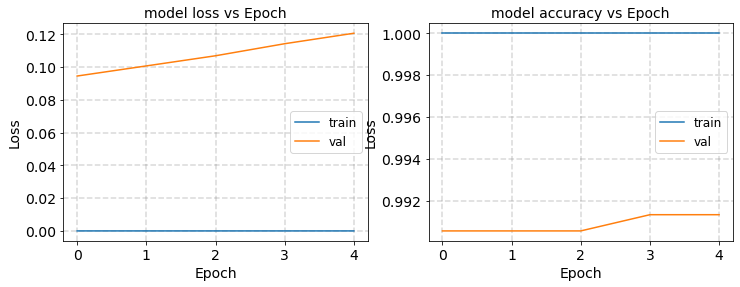

8
Epoch 1/5
1250/1250 - 7s - loss: 0.0893 - accuracy: 0.9826 - val_loss: 0.0478 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 6s - loss: 6.6837e-04 - accuracy: 0.9998 - val_loss: 0.0683 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 2.9703e-05 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 6s - loss: 6.7356e-06 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 2.4591e-06 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9865


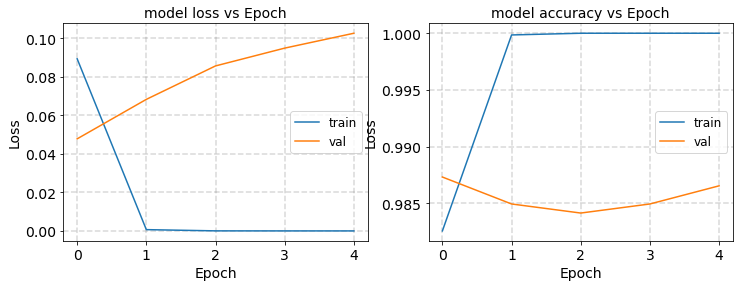

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0812 - accuracy: 0.9850 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 6s - loss: 9.1862e-04 - accuracy: 0.9999 - val_loss: 0.0433 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 6s - loss: 6.0443e-05 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 6s - loss: 1.8815e-05 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 6s - loss: 6.9355e-06 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9937


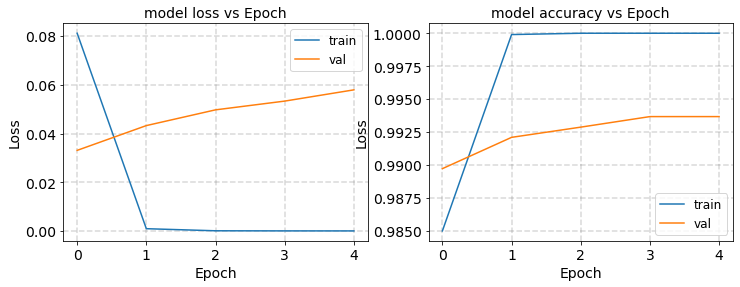

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0794 - accuracy: 0.9851 - val_loss: 0.0471 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 6s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0645 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 6s - loss: 7.5286e-05 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 6s - loss: 2.0380e-05 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 6s - loss: 6.9883e-06 - accuracy: 1.0000 - val_loss: 0.0936 - val_accuracy: 0.9881


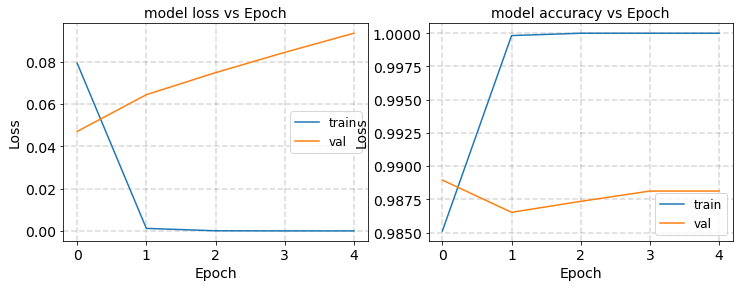

round2 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 6s - loss: 0.0776 - accuracy: 0.9854 - val_loss: 0.0598 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 6s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0749 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 6s - loss: 1.0360e-04 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 6s - loss: 2.7510e-05 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 8.4217e-06 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9858


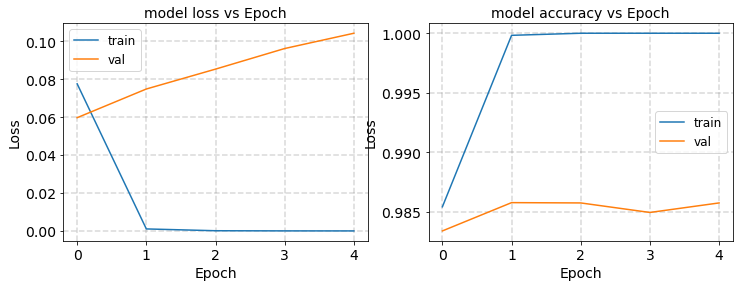

2
Epoch 1/5
1250/1250 - 7s - loss: 0.0733 - accuracy: 0.9885 - val_loss: 0.0358 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 6s - loss: 5.4632e-04 - accuracy: 0.9998 - val_loss: 0.0449 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 6s - loss: 3.1086e-05 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 6s - loss: 1.1499e-05 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 6s - loss: 4.4012e-06 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9945


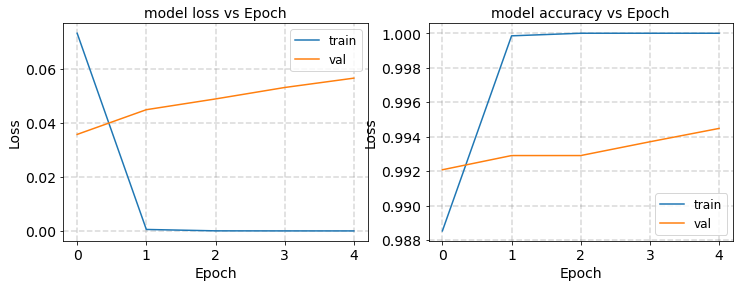

9
Epoch 1/5
1250/1250 - 6s - loss: 0.0734 - accuracy: 0.9880 - val_loss: 0.0675 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 6s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0763 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 6s - loss: 1.6416e-04 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 3.5390e-05 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 6s - loss: 1.3651e-05 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9874


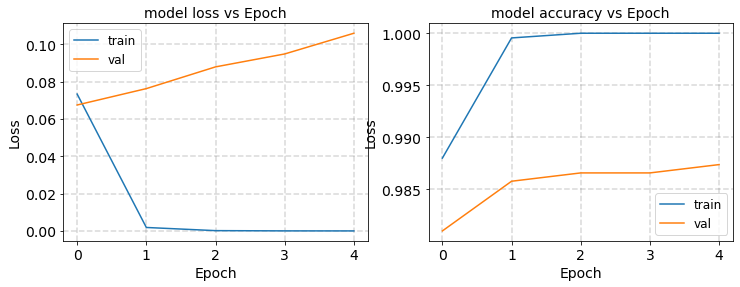

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0750 - accuracy: 0.9876 - val_loss: 0.0457 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 7.5298e-04 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 1.3399e-04 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 5s - loss: 4.6183e-05 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 5s - loss: 1.7140e-05 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9858


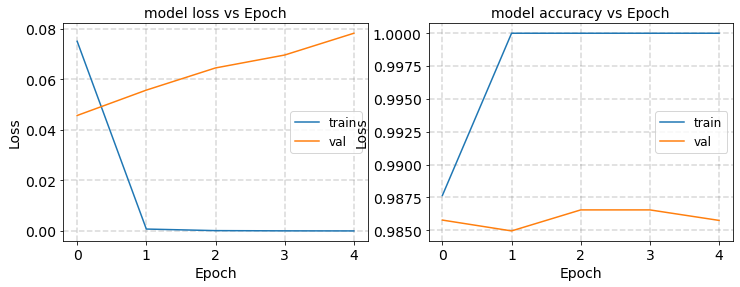

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 256)               131330    
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

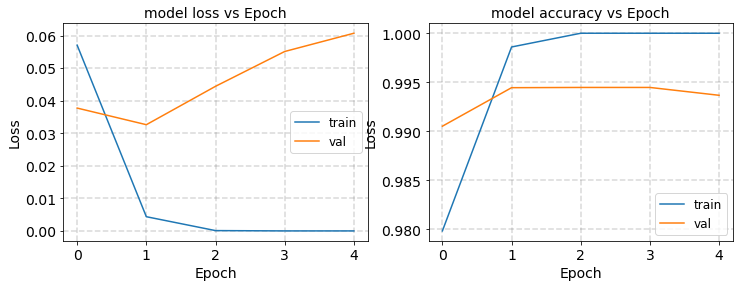

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0790 - accuracy: 0.9842 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0665 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0854 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0851 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 1.9189e-05 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9890


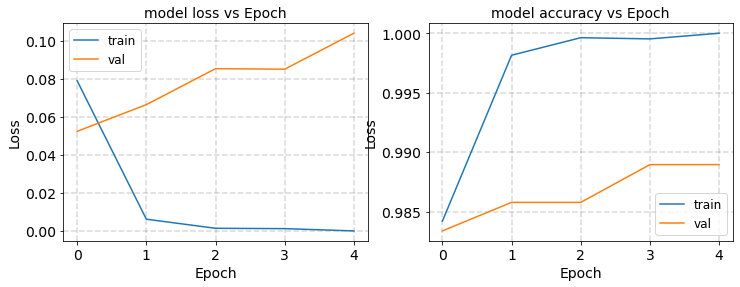

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0974 - accuracy: 0.9774 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0955 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 4.3598e-04 - accuracy: 0.9999 - val_loss: 0.0853 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 5s - loss: 4.3708e-05 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 5s - loss: 1.4486e-05 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9818


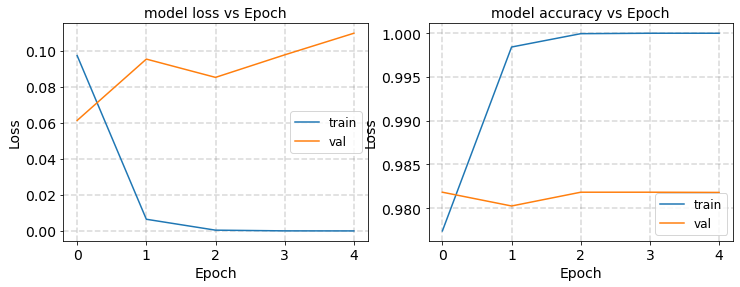

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0785 - accuracy: 0.9818 - val_loss: 0.0545 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0646 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 5s - loss: 1.6077e-04 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 1.9251e-05 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 6.6807e-06 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9866


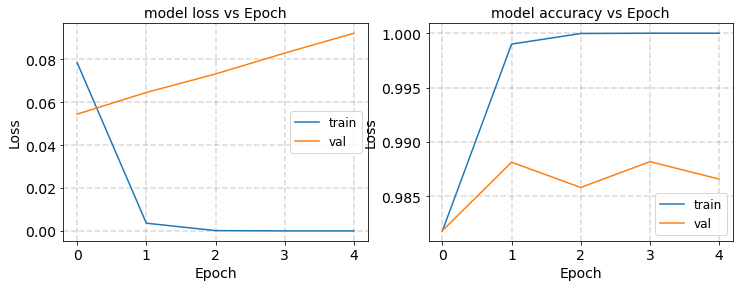

round1 [2 8 9 3]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0608 - accuracy: 0.9895 - val_loss: 0.0459 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 8.1210e-04 - accuracy: 0.9998 - val_loss: 0.0524 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 7.4888e-05 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.3489e-05 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 3.8413e-06 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9913


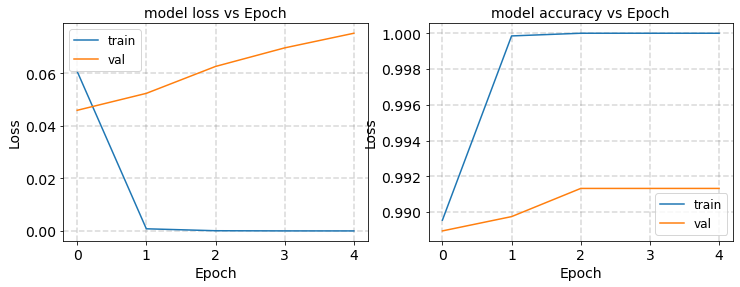

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0815 - accuracy: 0.9836 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0660 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 6.3356e-05 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 1.4257e-05 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 4.6398e-06 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9850


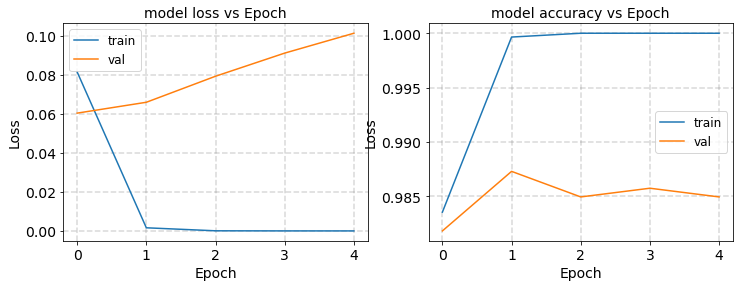

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0565 - accuracy: 0.9910 - val_loss: 0.0507 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 7.5399e-04 - accuracy: 0.9999 - val_loss: 0.0629 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 5s - loss: 3.9331e-05 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 7.0355e-06 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 1.8074e-06 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9897


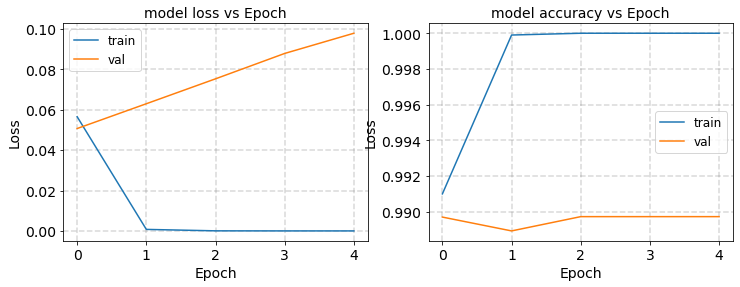

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0704 - accuracy: 0.9865 - val_loss: 0.0603 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0731 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 1.0052e-04 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 2.4015e-05 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 5.9908e-06 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9834


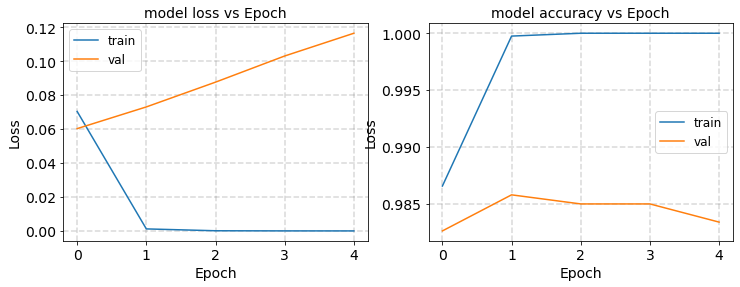

round2 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0919 - accuracy: 0.9852 - val_loss: 0.0482 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0539 - val_accuracy: 0.9953
Epoch 3/5
1250/1250 - 4s - loss: 1.0231e-04 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 5s - loss: 3.2910e-05 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 1.1978e-05 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9945


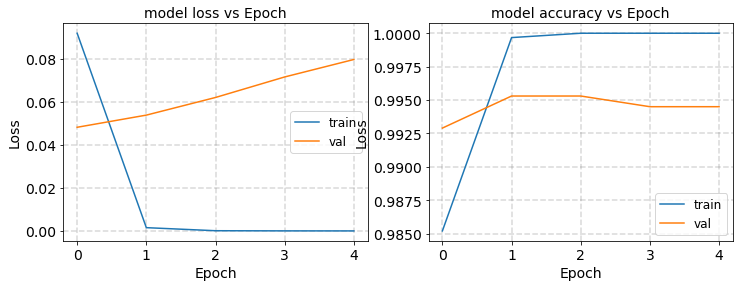

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0949 - accuracy: 0.9821 - val_loss: 0.0461 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 5s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0400 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 2.3970e-04 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 5.9089e-05 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 2.1446e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9874


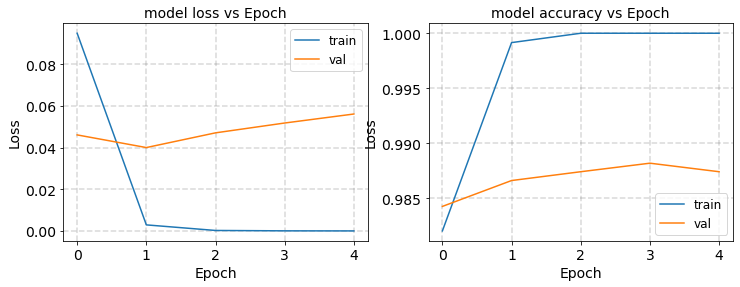

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0876 - accuracy: 0.9819 - val_loss: 0.0716 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.1026 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 4.1310e-04 - accuracy: 0.9999 - val_loss: 0.0824 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 4.8804e-05 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 1.5523e-05 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9850


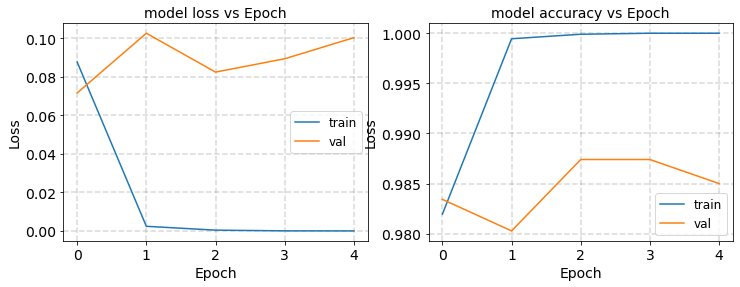

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0856 - accuracy: 0.9806 - val_loss: 0.0634 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0815 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 1.9524e-04 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 4.7436e-05 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 1.5120e-05 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9842


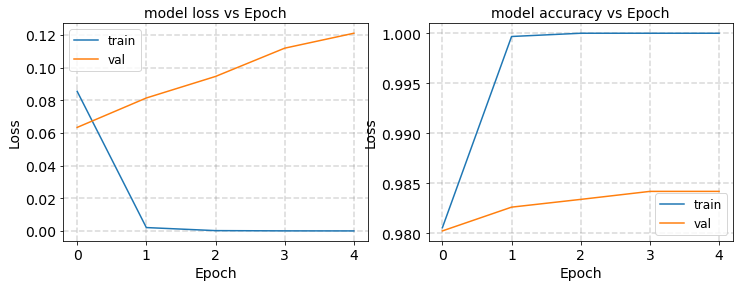

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 256)               131330    
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

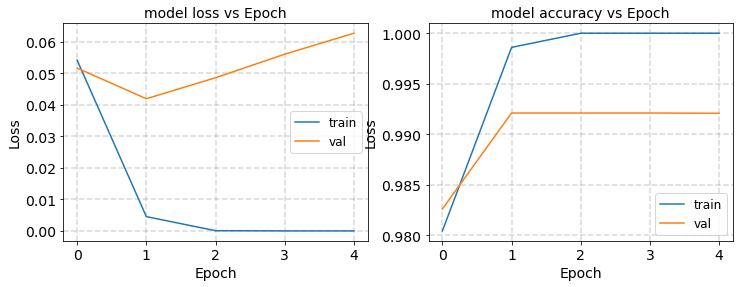

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0665 - accuracy: 0.9863 - val_loss: 0.0624 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0563 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 9.3988e-05 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 5s - loss: 1.9945e-05 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 8.2859e-06 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9905


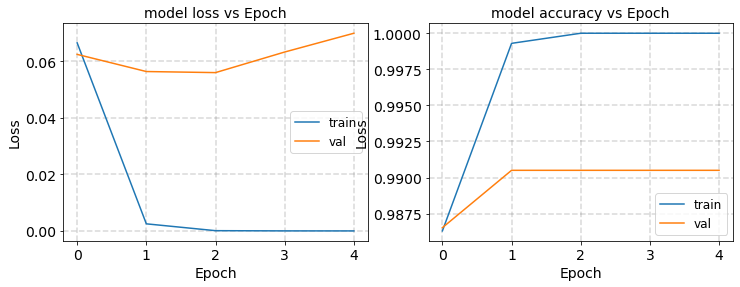

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0921 - accuracy: 0.9779 - val_loss: 0.0470 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0594 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 4.0291e-04 - accuracy: 0.9999 - val_loss: 0.0676 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 3.2136e-05 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 8.6864e-06 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9873


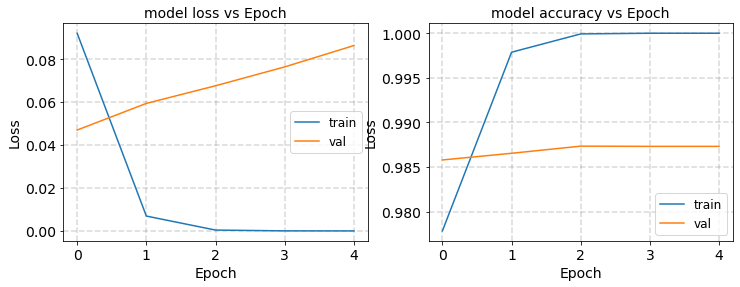

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0854 - accuracy: 0.9809 - val_loss: 0.0691 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0776 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0992 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0828 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 2.9828e-05 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9858


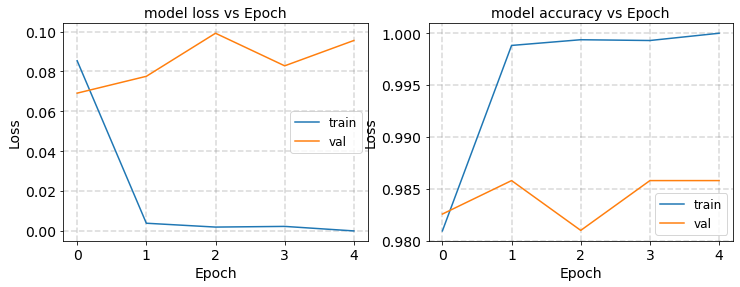

round1 [2 3 9 8]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0718 - accuracy: 0.9857 - val_loss: 0.0397 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0569 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 7.4646e-05 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 2.2598e-05 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 9.2062e-06 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9913


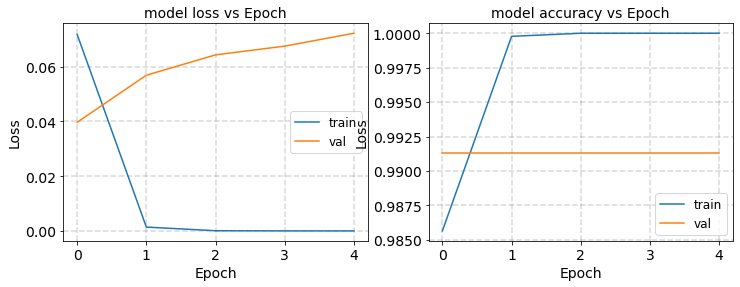

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1105 - accuracy: 0.9745 - val_loss: 0.0580 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 5s - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0806 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0821 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 1.1671e-04 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 4s - loss: 2.9318e-05 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9865


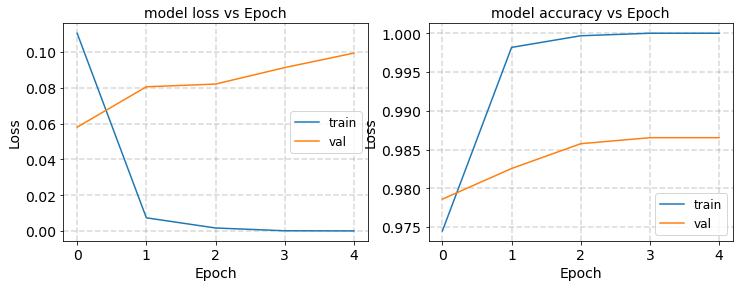

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0563 - accuracy: 0.9889 - val_loss: 0.0351 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0388 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 1.1916e-04 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 3.5389e-05 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 1.3098e-05 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9929


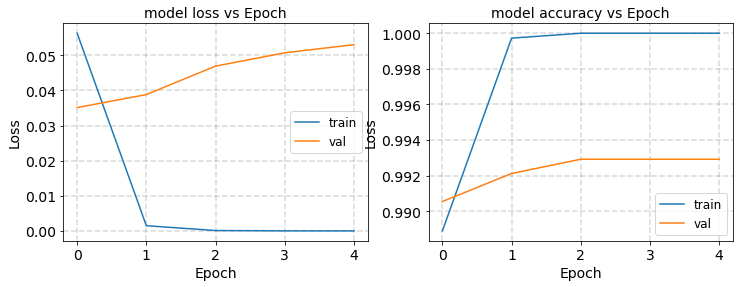

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1194 - accuracy: 0.9717 - val_loss: 0.0536 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0840 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 3.8600e-04 - accuracy: 0.9999 - val_loss: 0.0990 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 6.3132e-05 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 1.9087e-05 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9834


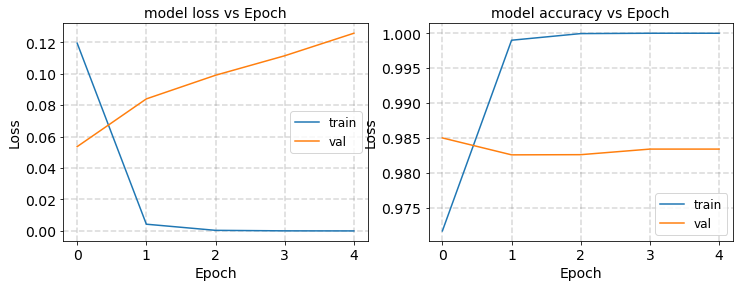

round2 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0987 - accuracy: 0.9793 - val_loss: 0.0614 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0790 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 1.1021e-04 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 2.6677e-05 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 3s - loss: 8.1900e-06 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9873


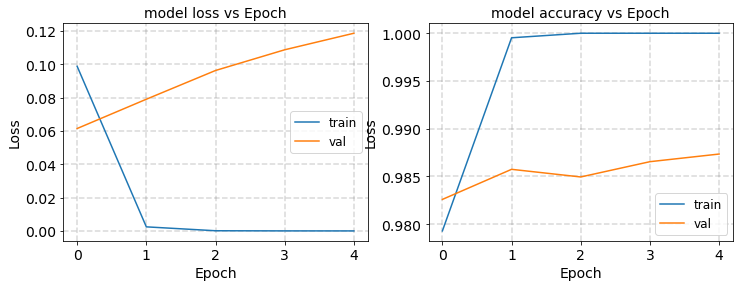

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0715 - accuracy: 0.9862 - val_loss: 0.0849 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 3.6685e-04 - accuracy: 0.9999 - val_loss: 0.0990 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 4.5073e-05 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 1.3922e-05 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 5.9499e-06 - accuracy: 1.0000 - val_loss: 0.1372 - val_accuracy: 0.9834


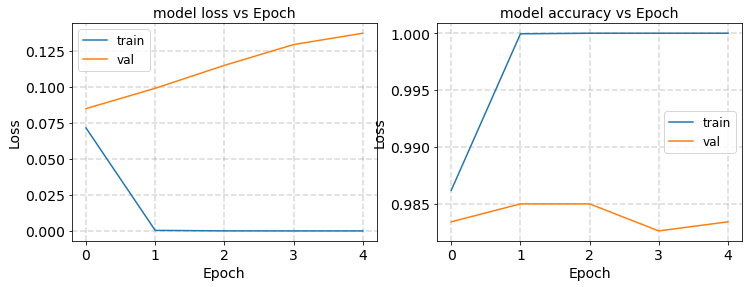

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0989 - accuracy: 0.9828 - val_loss: 0.0450 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0474 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 1.2065e-04 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 2.9056e-05 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 3.6116e-06 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9922


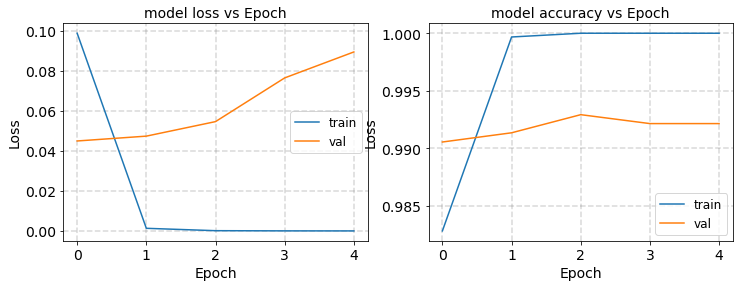

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1555 - accuracy: 0.9759 - val_loss: 0.0417 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 9.9515e-04 - accuracy: 0.9999 - val_loss: 0.0541 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 1.2620e-04 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 4.3134e-05 - accuracy: 1.0000 - val_loss: 0.0688 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.5132e-05 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9937


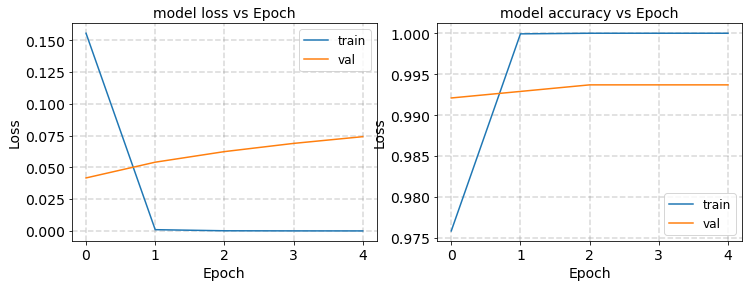

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 256)               131330    
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

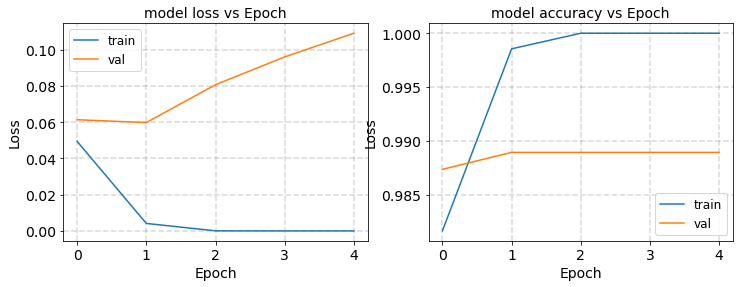

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0960 - accuracy: 0.9754 - val_loss: 0.0557 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.0723 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 3s - loss: 7.0936e-04 - accuracy: 0.9999 - val_loss: 0.0795 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 3s - loss: 4.4480e-05 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 0.9833
Epoch 5/5
1250/1250 - 3s - loss: 1.6751e-05 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9818


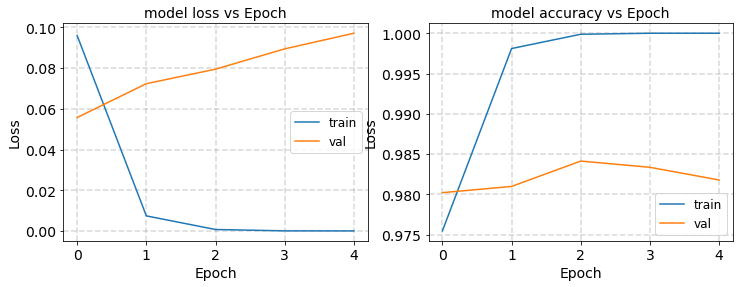

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0809 - accuracy: 0.9819 - val_loss: 0.0530 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0834 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0835 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 3.7012e-05 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 1.4238e-05 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9834


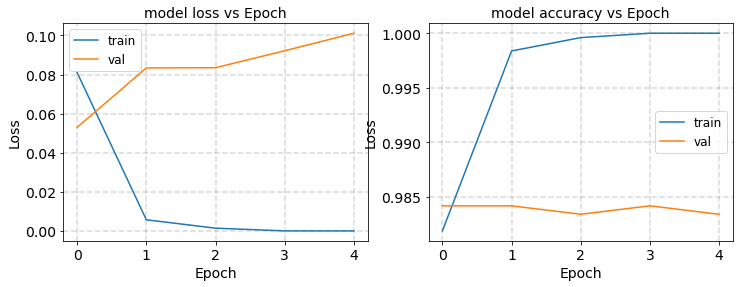

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0700 - accuracy: 0.9861 - val_loss: 0.0390 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0463 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 9.9909e-04 - accuracy: 0.9997 - val_loss: 0.0554 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0550 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 3.4257e-05 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9906


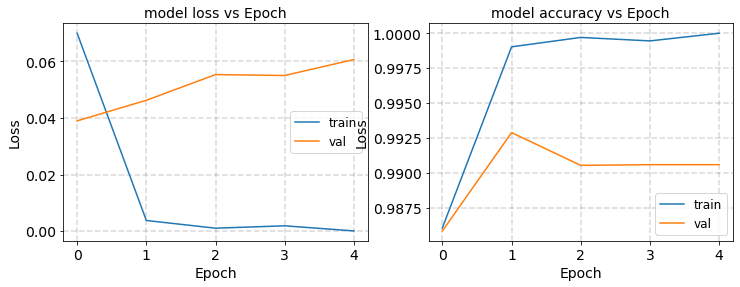

round1 [2 8 9 3]
2
Epoch 1/5
1250/1250 - 3s - loss: 1.1347e-05 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 4.3186e-06 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.4194e-06 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 5.4849e-07 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 2.5014e-07 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9913


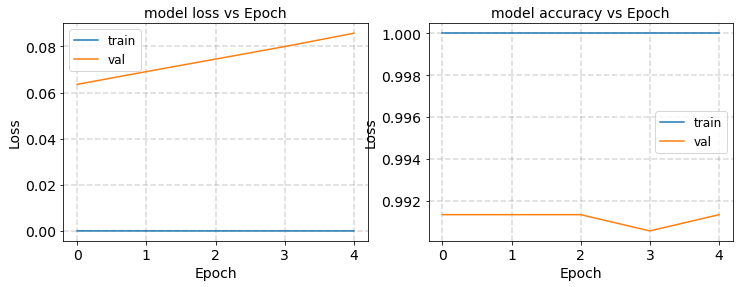

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0980 - accuracy: 0.9782 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0504 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 1.7690e-04 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 3s - loss: 3.7569e-05 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 1.5146e-05 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9873


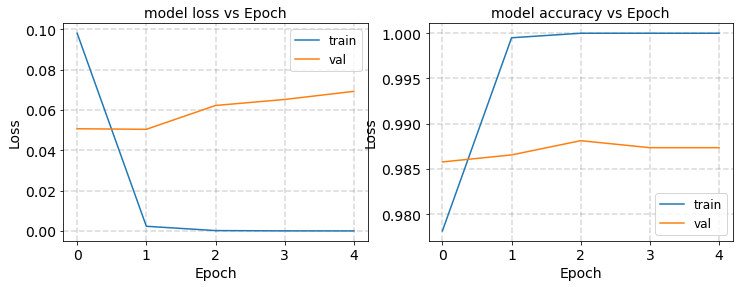

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0571 - accuracy: 0.9897 - val_loss: 0.0498 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0554 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 5.1239e-05 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.5518e-05 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 5.8194e-06 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9905


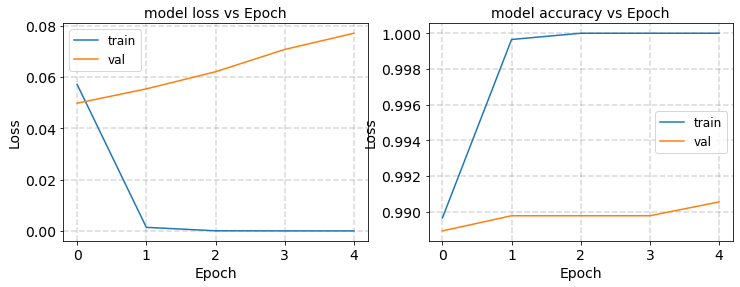

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1007 - accuracy: 0.9789 - val_loss: 0.0787 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0774 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 2.5596e-04 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 6.3283e-05 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 2.1604e-05 - accuracy: 1.0000 - val_loss: 0.1124 - val_accuracy: 0.9842


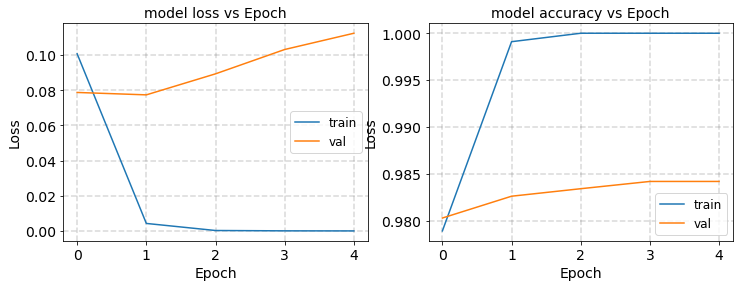

round2 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 6.6089e-06 - accuracy: 1.0000 - val_loss: 0.1309 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 1.3059e-06 - accuracy: 1.0000 - val_loss: 0.1443 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 4.6157e-07 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 2.0288e-07 - accuracy: 1.0000 - val_loss: 0.1644 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 9.8601e-08 - accuracy: 1.0000 - val_loss: 0.1733 - val_accuracy: 0.9818


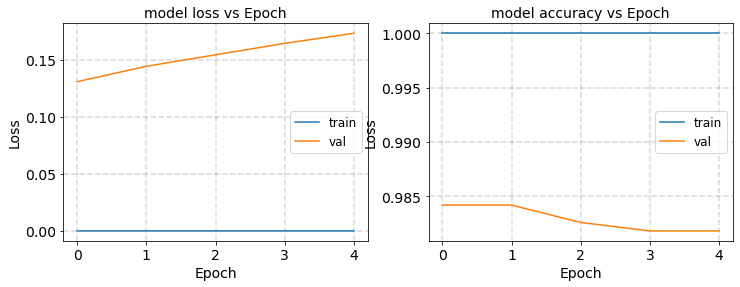

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1051 - accuracy: 0.9843 - val_loss: 0.0497 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0649 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 1.5515e-04 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 3.9545e-05 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.3100e-05 - accuracy: 1.0000 - val_loss: 0.1016 - val_accuracy: 0.9913


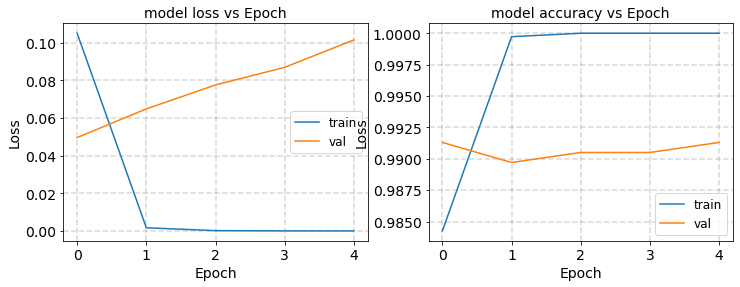

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0838 - accuracy: 0.9844 - val_loss: 0.0607 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0679 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 1.4468e-04 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 3s - loss: 4.2838e-05 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 1.4447e-05 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9826


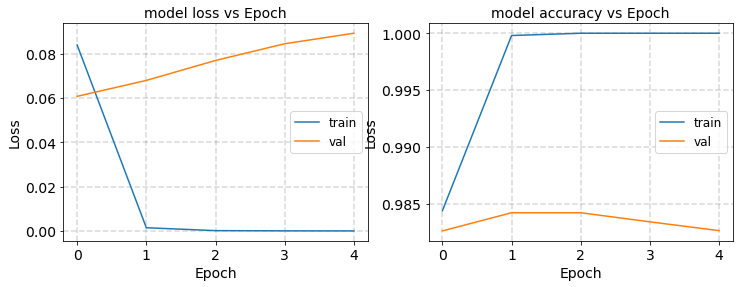

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0533 - accuracy: 0.9922 - val_loss: 0.0283 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 6.7987e-04 - accuracy: 0.9999 - val_loss: 0.0386 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 8.6381e-04 - accuracy: 0.9998 - val_loss: 0.0341 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 3.2437e-05 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 1.3813e-05 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9945


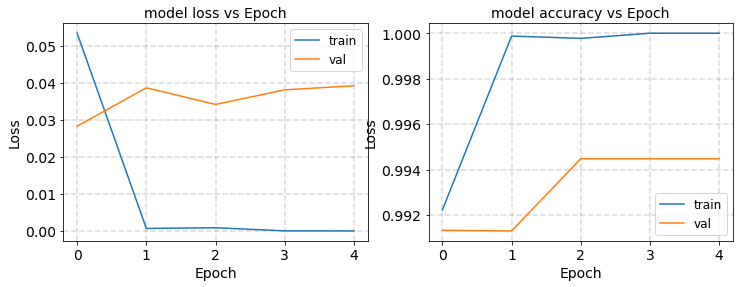

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 256)               131330    
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

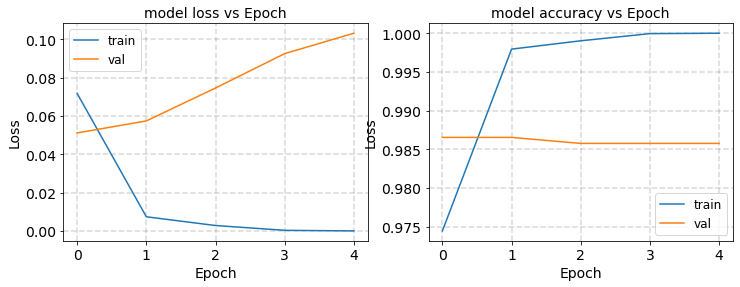

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0795 - accuracy: 0.9800 - val_loss: 0.0600 - val_accuracy: 0.9764
Epoch 2/5
1250/1250 - 5s - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0671 - val_accuracy: 0.9804
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0591 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 1.2821e-04 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 4s - loss: 1.4652e-05 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9843


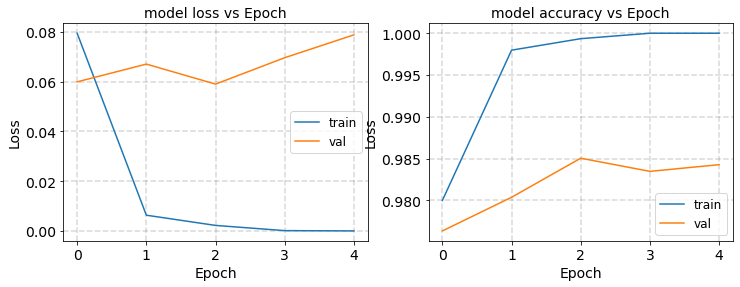

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0791 - accuracy: 0.9843 - val_loss: 0.0358 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0493 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 7.2121e-04 - accuracy: 0.9998 - val_loss: 0.0629 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 3.3451e-05 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.0591e-05 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9906


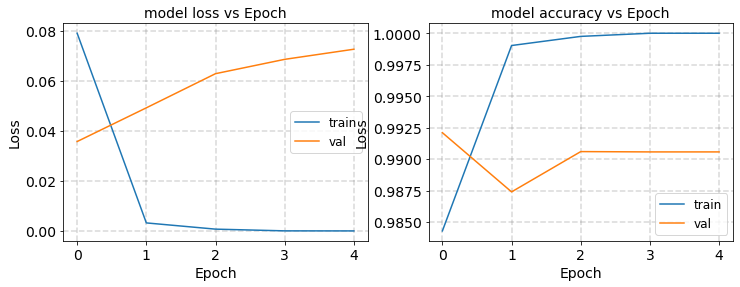

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0606 - accuracy: 0.9898 - val_loss: 0.0559 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0559 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 3s - loss: 3.2911e-04 - accuracy: 0.9999 - val_loss: 0.0594 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 3.1391e-05 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.0357e-05 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9897


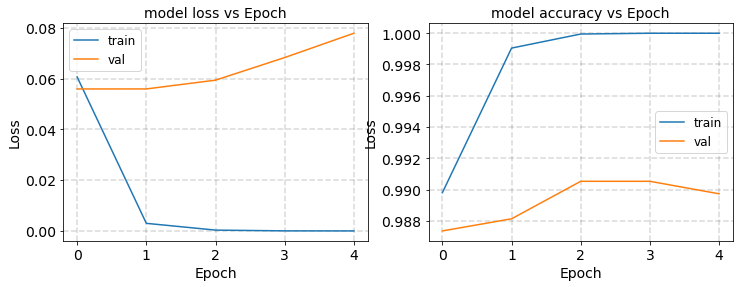

round1 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0856 - accuracy: 0.9829 - val_loss: 0.0600 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0772 - val_accuracy: 0.9849
Epoch 3/5
1250/1250 - 3s - loss: 1.1312e-04 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 3s - loss: 2.8725e-05 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 9.5341e-06 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 0.9857


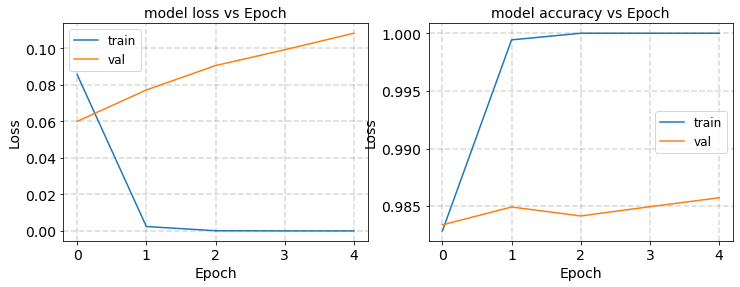

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0811 - accuracy: 0.9825 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0904 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 3s - loss: 1.0432e-04 - accuracy: 1.0000 - val_loss: 0.1030 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 1.9570e-05 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 4.7644e-06 - accuracy: 1.0000 - val_loss: 0.1312 - val_accuracy: 0.9826


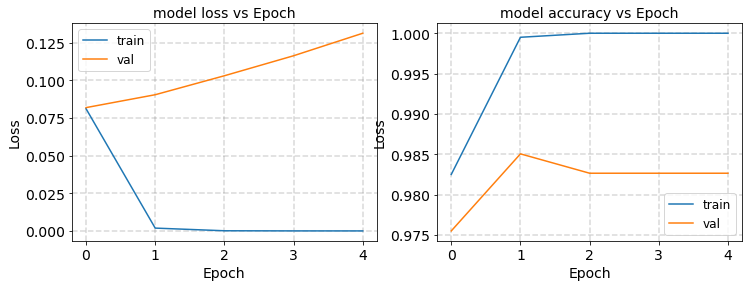

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0761 - accuracy: 0.9862 - val_loss: 0.0407 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0515 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 6.1491e-05 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.6908e-05 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 5.7936e-06 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9913


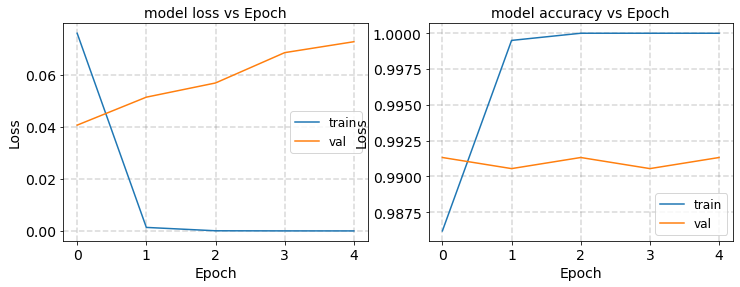

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0768 - accuracy: 0.9898 - val_loss: 0.0573 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 9.6260e-04 - accuracy: 0.9998 - val_loss: 0.0743 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 5.2121e-05 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.3898e-05 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 5.0780e-06 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9890


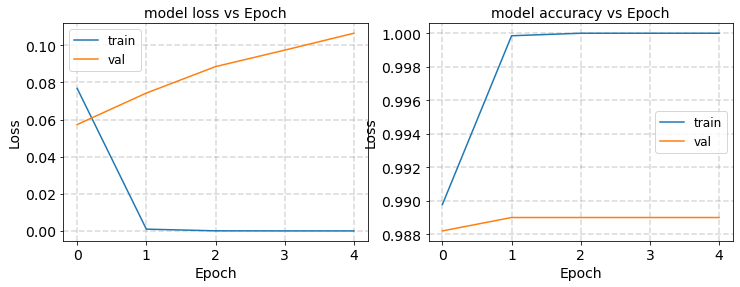

round2 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 2.0719e-06 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 8.7627e-07 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 3.7657e-07 - accuracy: 1.0000 - val_loss: 0.1291 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.6930e-07 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 7.7946e-08 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9890


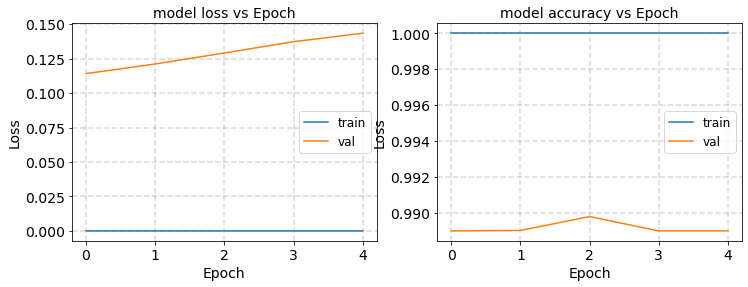

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0940 - accuracy: 0.9869 - val_loss: 0.0724 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 1.9346e-04 - accuracy: 1.0000 - val_loss: 0.0862 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 3.0498e-05 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 8.9132e-06 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 3.4607e-06 - accuracy: 1.0000 - val_loss: 0.1318 - val_accuracy: 0.9858


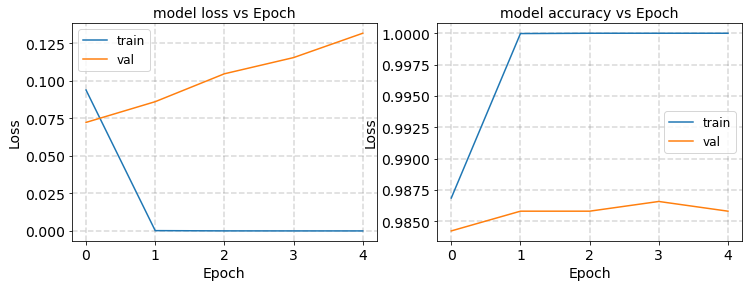

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1101 - accuracy: 0.9837 - val_loss: 0.0502 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0690 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 1.4888e-04 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 3.8534e-05 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 1.3457e-05 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9866


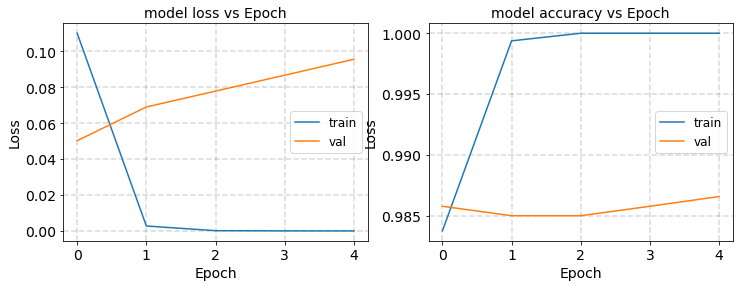

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0999 - accuracy: 0.9736 - val_loss: 0.0615 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0732 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 5s - loss: 1.4559e-04 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 3s - loss: 4.8609e-05 - accuracy: 1.0000 - val_loss: 0.0914 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 1.8766e-05 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9843


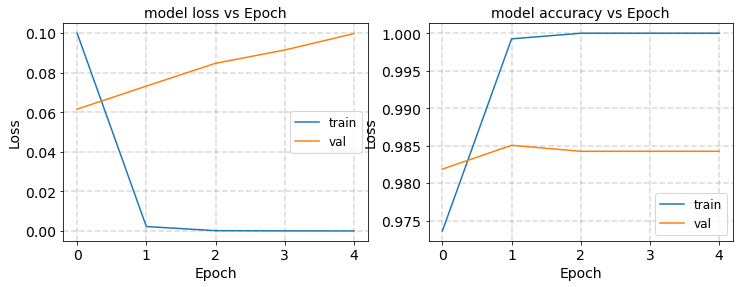

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 256)               131330    
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_08_4_256_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=256,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_4_256_run0  1.93063           1.903      0.0139811   
2389_seq_prune_08_4_256_run1  1.96351         1.91723      0.0160711   
2389_seq_prune_08_4_256_run2  1.88589         1.84145      0.0176868   
2389_seq_prune_08_4_256_run3  2.04832         1.98015      0.0106906   
2389_seq_prune_08_4_256_run4  1.98095         1.92666      0.0126047   
2389_seq_prune_08_4_256_run5  1.98698         1.93619      0.0143643   
2389_seq_prune_08_4_256_run6  2.00305          1.9512      0.0166169   
2389_seq_prune_08_4_256_run7   2.0432         1.98968      0.0192718   
2389_seq_prune_08_4_256_run8  1.93929         1.90356      0.0105348   
2389_seq_prune_08_4_256_run9  1.97576         1.91175      0.0152643   

                             Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_4_256_run0     0.00312627         95     0.1           No   
2389_seq_prune_08_4_256_run1     0.00359361        100       0          Yes   
2389_seq_prune_08_4_256_run2     0.00395488        100       0          Yes   
2389_seq_prune_08_4_256_run3      0.0023905        100       0          Yes   
2389_seq_prune_08_4_256_run4     0.00281849        100       0          Yes   
2389_seq_prune_08_4_256_run5     0.00321197        100       0          Yes   
2389_seq_prune_08_4_256_run6     0.00371565        100       0          Yes   
2389_seq_prune_08_4_256_run7      0.0043093        100       0          Yes   
2389_seq_prune_08_4_256_run8     0.00235566        100       0          Yes   
2389_seq_prune_08_4_256_run9     0.00341319        100       0          Yes   

                             Direction  Accuracy  
2389_seq_prune_08_4_256_run0    larger  0.962925  
2389_seq_prune_08_4_256_run1    larger  0.963575  
2389_seq_prune_08_4_256_run2    larger   0.95575  
2389_seq_prune_08_4_256_run3    larger   0.95185  
2389_seq_prune_08_4_256_run4    larger  0.954325  
2389_seq_prune_08_4_256_run5    larger   0.95735  
2389_seq_prune_08_4_256_run6    larger  0.970025  
2389_seq_prune_08_4_256_run7    larger   0.96295  
2389_seq_prune_08_4_256_run8    larger    0.9605  
2389_seq_prune_08_4_256_run9    larger    0.9606

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_4_256_run0  1.93063           1.903      0.0139811   
2389_seq_prune_08_4_256_run1  1.96351         1.91723      0.0160711   
2389_seq_prune_08_4_256_run2  1.88589         1.84145      0.0176868   
2389_seq_prune_08_4_256_run3  2.04832         1.98015      0.0106906   
2389_seq_prune_08_4_256_run4  1.98095         1.92666      0.0126047   
2389_seq_prune_08_4_256_run5  1.98698         1.93619      0.0143643   
2389_seq_prune_08_4_256_run6  2.00305          1.9512      0.0166169   
2389_seq_prune_08_4_256_run7   2.0432         1.98968      0.0192718   
2389_seq_prune_08_4_256_run8  1.93929         1.90356      0.0105348   
2389_seq_prune_08_4_256_run9  1.97576         1.91175      0.0152643   

                             Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_4_256_run0     0.00312627         95     0.1           No   
2389_seq_prune_08_4_256_run1     0.00359361        100       0          Yes   
2389_seq_prune_08_4_256_run2     0.00395488        100       0          Yes   
2389_seq_prune_08_4_256_run3      0.0023905        100       0          Yes   
2389_seq_prune_08_4_256_run4     0.00281849        100       0          Yes   
2389_seq_prune_08_4_256_run5     0.00321197        100       0          Yes   
2389_seq_prune_08_4_256_run6     0.00371565        100       0          Yes   
2389_seq_prune_08_4_256_run7      0.0043093        100       0          Yes   
2389_seq_prune_08_4_256_run8     0.00235566        100       0          Yes   
2389_seq_prune_08_4_256_run9     0.00341319        100       0          Yes   

                             Direction  Accuracy  
2389_seq_prune_08_4_256_run0    larger  0.962925  
2389_seq_prune_08_4_256_run1    larger  0.963575  
2389_seq_prune_08_4_256_run2    larger   0.95575  
2389_seq_prune_08_4_256_run3    larger   0.95185  
2389_seq_prune_08_4_256_run4    larger  0.954325  
2389_seq_prune_08_4_256_run5    larger   0.95735  
2389_seq_prune_08_4_256_run6    larger  0.970025  
2389_seq_prune_08_4_256_run7    larger   0.96295  
2389_seq_prune_08_4_256_run8    larger    0.9605  
2389_seq_prune_08_4_256_run9    larger    0.9606

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.        , -0.        ,  0.        , ...,  0.06959198,
         0.06970452,  0.06871608],
       [ 0.        ,  0.        ,  0.07463127, ..., -0.        ,
         0.06974588,  0.        ],
       [-0.        , -0.07426509,  0.        , ...,  0.        ,
         0.07371083, -0.06938741],
       ...,
       [-0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        , ..., -0.        ,
        -0.        ,  0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.9306332641733215
1.9030032422158238
0.013981083803124654
0.003126265378290801
95.0
0.1
No
larger
0.9629250168800354


In [9]:
# file_list = ['df_2467_sim_prune_0_4_64_run',
#             'df_2467_sim_prune_0_4_128_run',
#             'df_2467_sim_prune_0_4_256_run',
#             'df_2467_sim_prune_04_4_64_run',
#             'df_2467_sim_prune_04_4_128_run',
#             'df_2467_sim_prune_04_4_256_run',
#             'df_2467_sim_prune_08_2_32_run',
#             'df_2467_sim_prune_08_4_64_run',
#             'df_2467_sim_prune_08_4_128_run',
#             'df_2467_sim_prune_08_4_256_run']
# dfs = []
# for f in file_list:
#     file = './Exps/sim/' + f
#     with open(f, 'rb') as fp:
#         dfs.append(pickle.load(f))